In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# **Data Preprocessing**
## **1. Data Collection**

In [ ]:
# Load the data companies
companies = 'https://drive.google.com/file/d/1WAM3YBCANlxK5ck67YDuAC7wVCo4f9L2/view?usp=drive_link'
# Read data
companies_path = 'https://drive.google.com/uc?export=download&id='+ companies.split('/')[-2]
companies_df = pd.read_csv(companies_path,encoding= 'unicode_escape')

In [ ]:
# Load the data stockprices
stockprices = 'https://drive.google.com/file/d/1MgPyKaob_ihkjxmoHs-NlYxhKVcronO2/view?usp=sharing'
# Read data
stockprices_path = 'https://drive.google.com/uc?export=download&id='+ stockprices.split('/')[-2]
stock_prices_df = pd.read_csv(stockprices_path,encoding= 'unicode_escape')

In [ ]:
# Display the first few rows
print("Big Tech Companies Dataset:")
print(companies_df.head())

print("\nBig Tech Stock Prices Dataset:")
print(stock_prices_df.head())

Big Tech Companies Dataset:
  stock_symbol              company
0         AAPL           Apple Inc.
1         ADBE           Adobe Inc.
2         AMZN     Amazon.com, Inc.
3          CRM     Salesforce, Inc.
4         CSCO  Cisco Systems, Inc.

Big Tech Stock Prices Dataset:
  stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  


## **2. Data Inspection**

In [ ]:
# Check the data types and missing values
print("Big Tech Companies Dataset:")
print(companies_df.info())

print("\nBig Tech Stock Prices Dataset:")
print(stock_prices_df.info())

Big Tech Companies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stock_symbol  14 non-null     object
 1   company       14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes
None

Big Tech Stock Prices Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB
None


In [ ]:
# Check summary statistics of datasets
print("Big Tech Companies Dataset:")
print(companies_df.describe())

print("\nBig Tech Stock Prices Dataset:")
print(stock_prices_df.describe())

Big Tech Companies Dataset:
       stock_symbol     company
count            14          14
unique           14          14
top            AAPL  Apple Inc.
freq              1           1

Big Tech Stock Prices Dataset:
               open          high           low         close     adj_close  \
count  45088.000000  45088.000000  45088.000000  45088.000000  45088.000000   
mean      89.266584     90.369825     88.111930     89.271306     85.209631   
std      101.626955    103.001073    100.124399    101.592916    100.995967   
min        1.076000      1.108667      0.998667      1.053333      1.053333   
25%       25.670000     25.930135     25.360001     25.660000     22.076433   
50%       47.930000     48.459999     47.465000     47.970001     45.377333   
75%      128.662502    129.848900    127.253945    128.640609    113.672460   
max      696.280029    700.989990    686.090027    691.690002    691.690002   

             volume  
count  4.508800e+04  
mean   5.297813e+07  
st

In [ ]:
# The number of unique companies and symbols in the datasets
print("\nUnique Companies in Big Tech Companies Dataset:")
print(companies_df['company'].nunique())

print("\nUnique Stock Symbols in Big Tech Stock Prices Dataset:")
print(stock_prices_df['stock_symbol'].nunique())


Unique Companies in Big Tech Companies Dataset:
14

Unique Stock Symbols in Big Tech Stock Prices Dataset:
14


In [ ]:
# Check for missing values
print("\nMissing Values in Big Tech Companies Dataset:")
print(companies_df.isnull().sum())

print("\nMissing Values in Big Tech Stock Prices Dataset:")
print(stock_prices_df.isnull().sum())


Missing Values in Big Tech Companies Dataset:
stock_symbol    0
company         0
dtype: int64

Missing Values in Big Tech Stock Prices Dataset:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


In [ ]:
# The number of stock symbols
print("\nStock Symbol Counts in Big Tech Stock Prices Dataset:")
print(stock_prices_df['stock_symbol'].value_counts())


Stock Symbol Counts in Big Tech Stock Prices Dataset:
stock_symbol
AAPL     3271
ADBE     3271
AMZN     3271
CRM      3271
CSCO     3271
GOOGL    3271
IBM      3271
INTC     3271
MSFT     3271
NFLX     3271
NVDA     3271
ORCL     3271
TSLA     3148
META     2688
Name: count, dtype: int64


In [ ]:
print(companies_df)


print(stock_prices_df)

   stock_symbol                                      company
0          AAPL                                   Apple Inc.
1          ADBE                                   Adobe Inc.
2          AMZN                             Amazon.com, Inc.
3           CRM                             Salesforce, Inc.
4          CSCO                          Cisco Systems, Inc.
5         GOOGL                                Alphabet Inc.
6           IBM  International Business Machines Corporation
7          INTC                            Intel Corporation
8          META                         Meta Platforms, Inc.
9          MSFT                        Microsoft Corporation
10         NFLX                                Netflix, Inc.
11         NVDA                           NVIDIA Corporation
12         ORCL                           Oracle Corporation
13         TSLA                                  Tesla, Inc.
      stock_symbol        date        open        high         low  \
0             A

## **3. Data Transformation**

In [ ]:
# convert the date column to datetime format
stock_prices_df['date'] = pd.to_datetime(stock_prices_df['date'])

## **4. Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Initializing MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
columns_to_normalize = ['open', 'high', 'low','close','adj_close','volume']

In [ ]:
stock_prices_df[columns_to_normalize] = scaler.fit_transform(stock_prices_df[columns_to_normalize])

# **Exploratory Data Analysis - EDA: Khám phá dữ liệu**
## **1. Statistical Analysis**

In [ ]:
# Rename
columns_of_statistical_analysis = ['open', 'high', 'low','close']
print(columns_of_statistical_analysis)
# Mean
means = stock_prices_df[columns_of_statistical_analysis].mean()
# Median
medians = stock_prices_df[columns_of_statistical_analysis].median()
# standard deviation
standard_deviations = stock_prices_df[columns_of_statistical_analysis].std()

['open', 'high', 'low', 'close']


In [ ]:
# Printing
print("Means:")
print(means)
print("\nMedians:")
print(medians)
print("\nStandard Deviations:")
print(standard_deviations)

Means:
open     0.126856
high     0.127538
low      0.127156
close    0.127734
dtype: float64

Medians:
open     0.067396
high     0.067656
low      0.067825
close    0.067932
dtype: float64

Standard Deviations:
open     0.146183
high     0.147169
low      0.146148
close    0.147100
dtype: float64


## **2. Data Visualization**

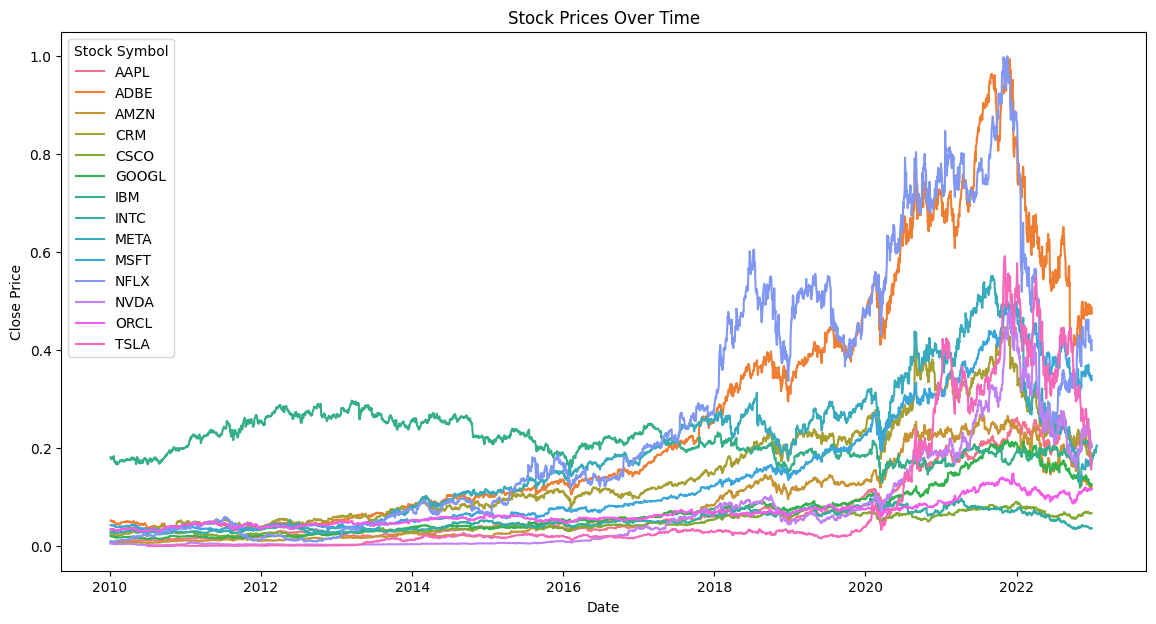

In [ ]:
# Stock prices visualization
plt.figure(figsize=(14, 7))
sns.lineplot(data=stock_prices_df, x='date', y='close', hue='stock_symbol')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Stock Symbol')
plt.show()

**Chart: Biến động giá cổ phiếu theo thời gian cho các công ty khác nhau.**

=> Nhận diện xu hướng dài hạn của từng cổ phiếu (xu hướng tăng, giảm, dao động không rõ ràng)

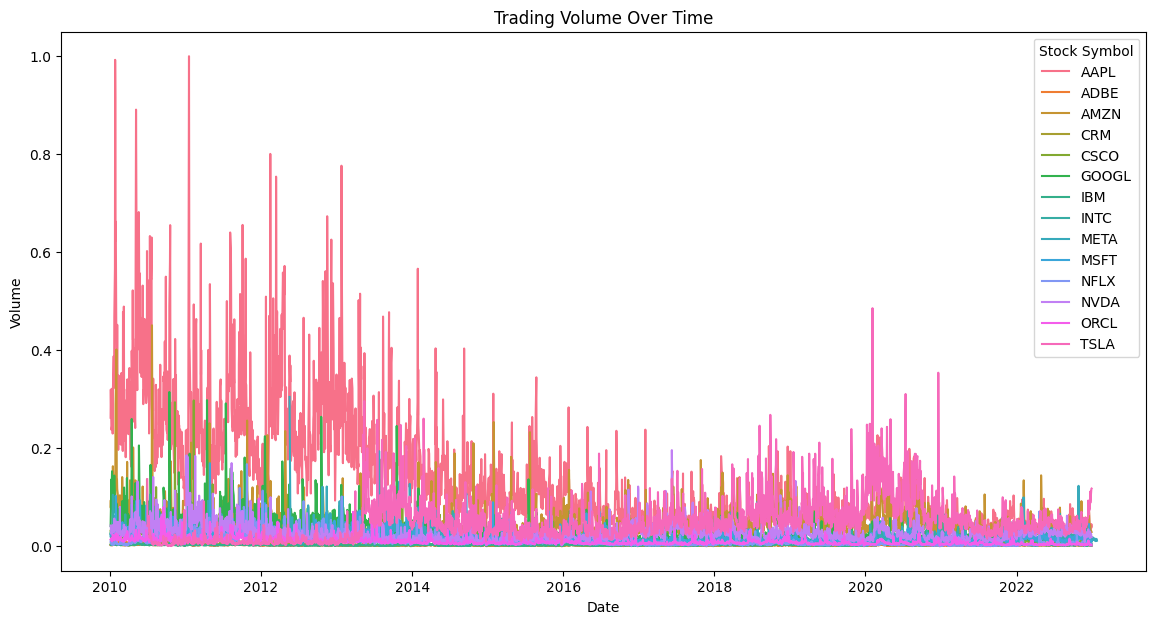

In [ ]:
# volume data visualization
plt.figure(figsize=(14, 7))
sns.lineplot(data=stock_prices_df, x='date', y='volume', hue='stock_symbol')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Stock Symbol')
plt.show()

**Chart: Khối lượng giao dịch của một cổ phiếu theo thời gian.**
+ Phát hiện các giai đoạn có khối lượng giao dịch cao hoặc thấp.
+ Cổ phiếu có khối lượng giao dịch cao thường có tính thanh khoản tốt hơn. (Tính thanh khoản: một khái niệm trong tài chính, chỉ mức độ mà một tài sản bất kì có thể được mua hoặc bán trên thị trường mà không làm ảnh hưởng nhiều đến giá thị trường của tài sản đó.)


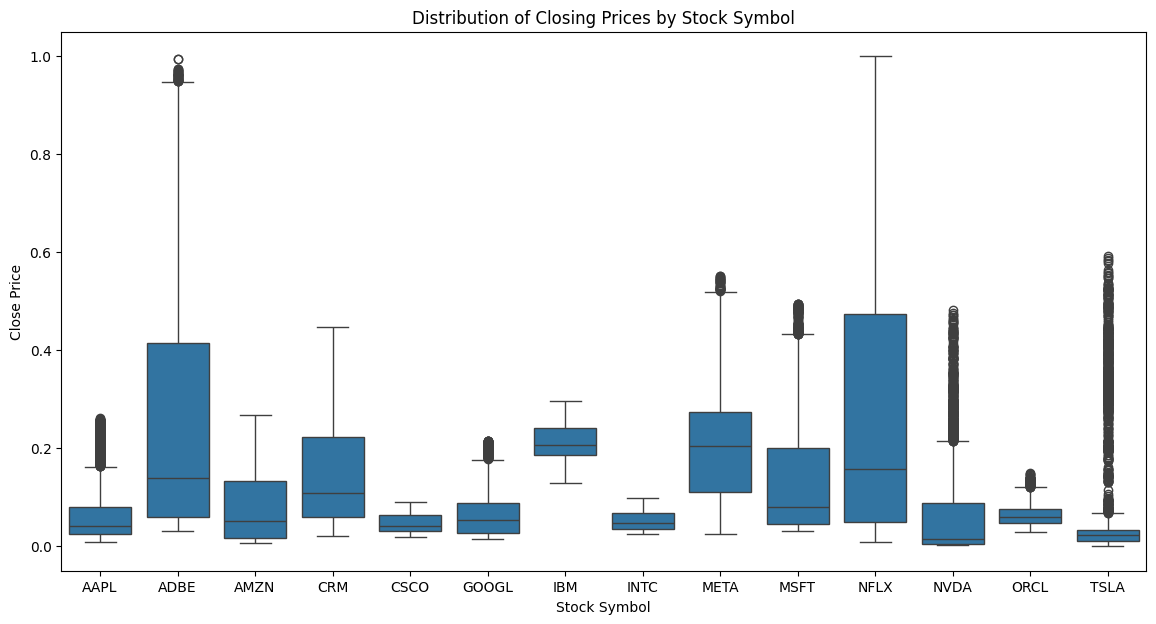

In [ ]:
# distribution of closing prices of different companies
plt.figure(figsize=(14, 7))
sns.boxplot(data=stock_prices_df, x='stock_symbol', y='close')
plt.title('Distribution of Closing Prices by Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Close Price')
plt.show()

**Chart: Phân phối giá đóng cửa của từng cổ phiếu.**

=> Phát hiện các cổ phiếu có giá cao hoặc thấp hơn so với các cổ phiếu khác và xác định các cổ phiếu có giá biến động lớn hoặc nhỏ.
*   ADBE (Adobe): Giá đóng cửa cao nhất và biến động lớn.
*   META (Facebook): Biến động rộng với nhiều điểm ngoại lệ.
*   NFLX (Netflix): Biến động giá rộng.
*   TSLA (Tesla): Nhiều biến động với nhiều điểm ngoại lệ.
*   MSFT (Microsoft) và NVDA (NVIDIA): Có giá đóng cửa trung bình cao và biến động đáng chú ý.

In [ ]:
# Time series analysis of a specific company (e.g. Apple)
apple_stock = stock_prices_df[stock_prices_df['stock_symbol'] == 'AAPL']
apple_stock.set_index('date', inplace=True)

In [ ]:
# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import prophet

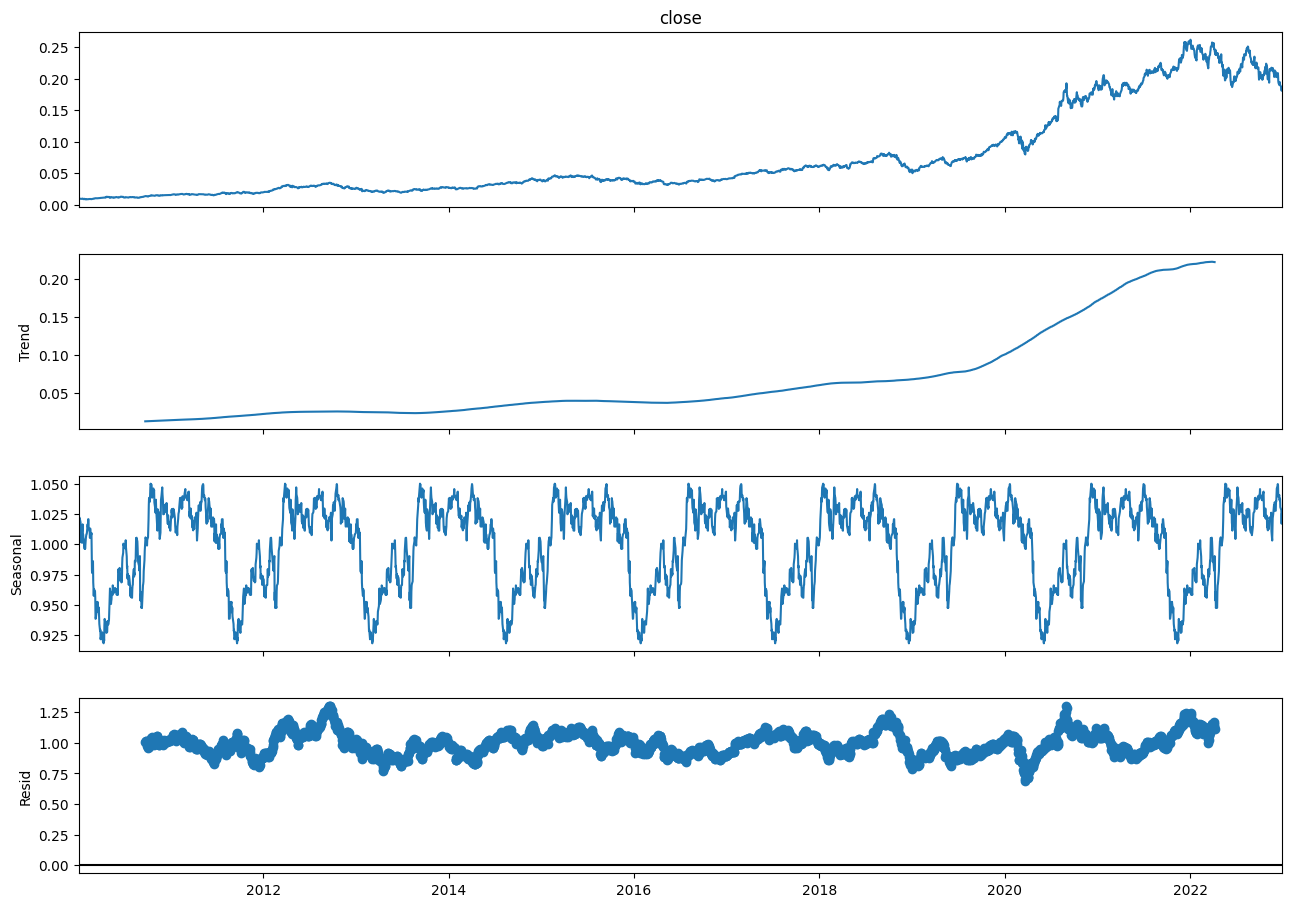

In [ ]:
# Time series decomposition of Apple stock prices
decomposition = seasonal_decompose(apple_stock['close'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

*   Chart 1: Hiển thị dữ liệu gốc về giá đóng cửa của cổ phiếu Apple qua thời gian.
*   Chart 2: Hiển thị thành phần xu hướng của dữ liệu giá cổ phiếu, cho thấy xu hướng tăng dần của giá cổ phiếu qua thời gian.
*   Chart 3: Hiển thị thành phần mùa vụ của dữ liệu giá cổ phiếu, cho thấy các dao động định kỳ hàng năm.
*   Chart 4: Hiển thị phần dư của dữ liệu giá cổ phiếu sau khi đã loại bỏ xu hướng và thành phần mùa vụ.

<ipython-input-24-703f7cf8a44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock['rolling_mean'] = apple_stock['close'].rolling(window=30).mean()


<Figure size 1400x700 with 0 Axes>

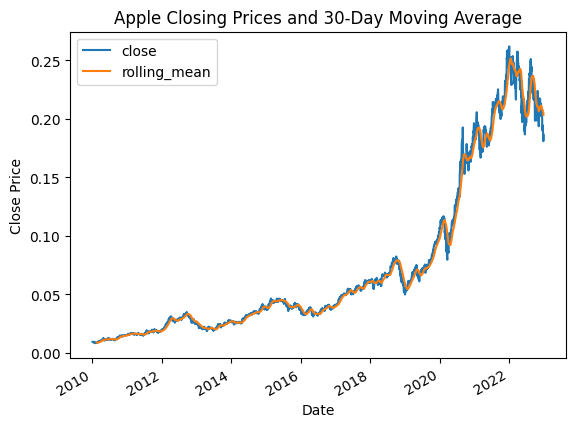

In [ ]:
# Add the moving averages of Apple stock prices
apple_stock['rolling_mean'] = apple_stock['close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
apple_stock[['close', 'rolling_mean']].plot()
plt.title('Apple Closing Prices and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

**Chart: Giá đóng cửa và trung bình động 30 ngày của cổ phiếu Apple.**
*   Dự đoán giá cổ phiếu:
 + Nhận diện các xu hướng ngắn hạn và dài hạn rõ ràng hơn.

 + Khi giá cổ phiếu cắt lên trên đường trung bình động, đó có thể là tín hiệu mua; ngược lại, khi giá cổ phiếu cắt xuống dưới đường trung bình động, đó có thể là tín hiệu bán.

*   Phân tích xu hướng thị trường:

 + Nhận diện các xu hướng chính của giá cổ phiếu.
 + Khi đường giá cổ phiếu nằm trên đường trung bình động và cả hai đều tăng, đó thường là tín hiệu của xu hướng tăng. Khi giá cổ phiếu nằm dưới đường trung bình động và cả hai đều giảm, đó thường là tín hiệu của xu hướng giảm.

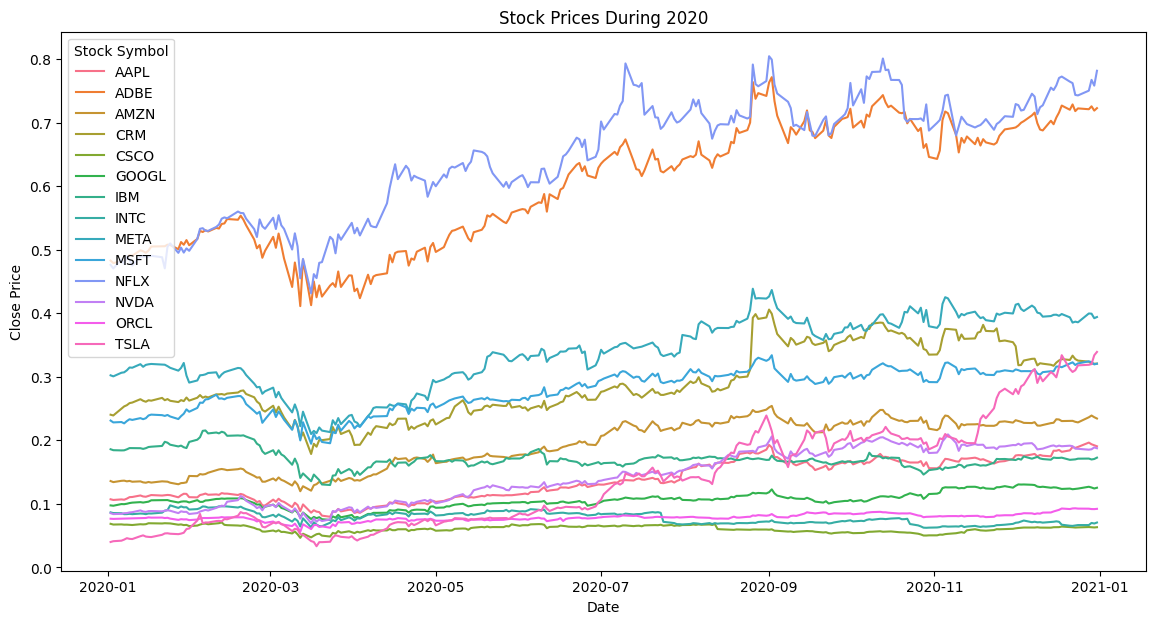

In [ ]:
# Examining price changes in a specific period (for example, 2020)
big_tech_stock_prices_2020 = stock_prices_df[(stock_prices_df['date'] >= '2020-01-01') & (stock_prices_df['date'] <= '2020-12-31')]

plt.figure(figsize=(14, 7))
sns.lineplot(data=big_tech_stock_prices_2020, x='date', y='close', hue='stock_symbol')
plt.title('Stock Prices During 2020')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Stock Symbol')
plt.show()

**Chart: Giá đóng cửa của cổ phiếu các công ty công nghệ lớn trong năm 2020.**
+ Dự đoán xu hướng tương lai của các cổ phiếu này.
+ Phân tích cách mà các cổ phiếu công nghệ lớn phản ứng với các sự kiện thị trường trong năm 2020 (ví dụ: Đại dịch COVID-19)

 + Cổ phiếu tăng mạnh trong năm 2020:

    + TSLA (Tesla): Có xu hướng tăng mạnh, đặc biệt là trong nửa cuối năm 2020.
    + AAPL (Apple): Tăng trưởng ổn định trong suốt năm 2020.

 + Cổ phiếu khác có hiệu suất đáng chú ý:

    + AMZN (Amazon): Có sự tăng trưởng mạnh mẽ trong năm 2020, phản ánh xu hướng mua sắm trực tuyến tăng cao trong đại dịch.
    + MSFT (Microsoft): Tăng trưởng ổn định trong năm 2020.
    + NFLX (Netflix): Tăng trưởng đáng kể do nhu cầu giải trí trực tuyến tăng cao trong thời gian giãn cách xã hội.

In [ ]:
# adding the year column to analyze annual average prices.
stock_prices_df['year'] = stock_prices_df['date'].dt.year

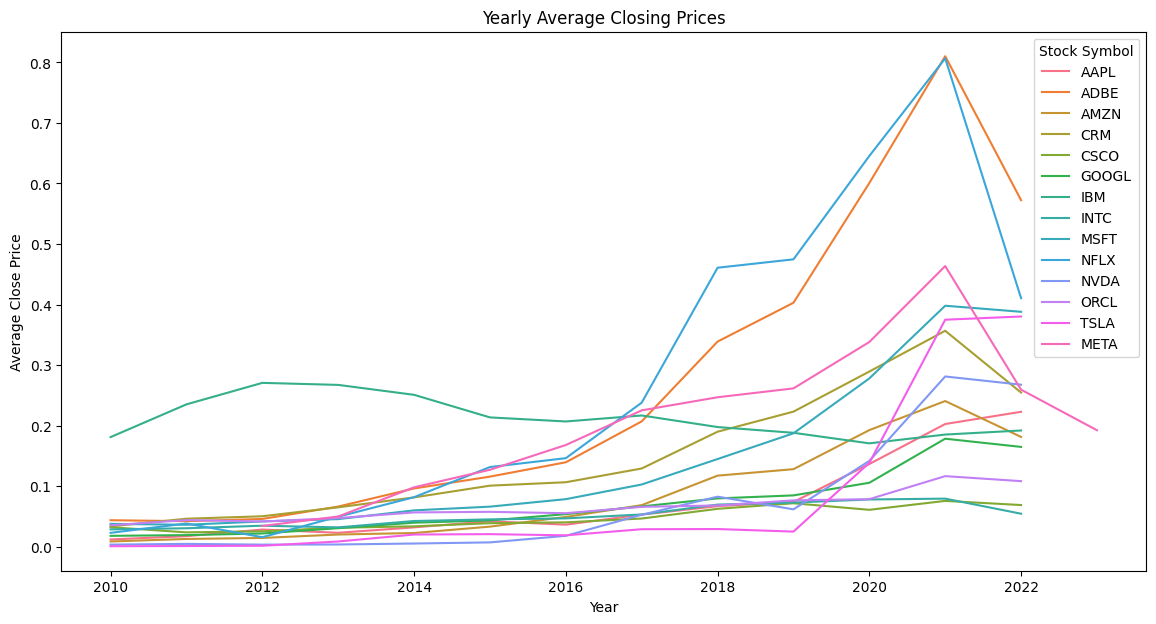

In [ ]:
# annual average prices calculation
yearly_avg_prices = stock_prices_df.groupby(['year', 'stock_symbol']).mean().reset_index()

# annual average prices visualization
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_avg_prices, x='year', y='close', hue='stock_symbol')
plt.title('Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.legend(title='Stock Symbol')
plt.show()

**Chart: Biểu đồ hiển thị giá đóng cửa trung bình hàng năm của nhiều cổ phiếu khác nhau từ năm 2010 đến 2022.**

 + TSLA: Giá tăng đáng kể từ khoảng năm 2018 đến 2021, sau đó giảm mạnh vào năm 2022.
 + NVDA: Giá tăng đều đặn từ khoảng năm 2015 và đạt đỉnh vào khoảng năm 2021, sau đó cũng giảm.
 + AAPL: Giá tăng từ khoảng năm 2015, đạt đỉnh vào khoảng năm 2021 và sau đó giảm.
 + GOOGL và MSFT: Tăng đều đặn qua các năm nhưng không có biến động quá lớn.

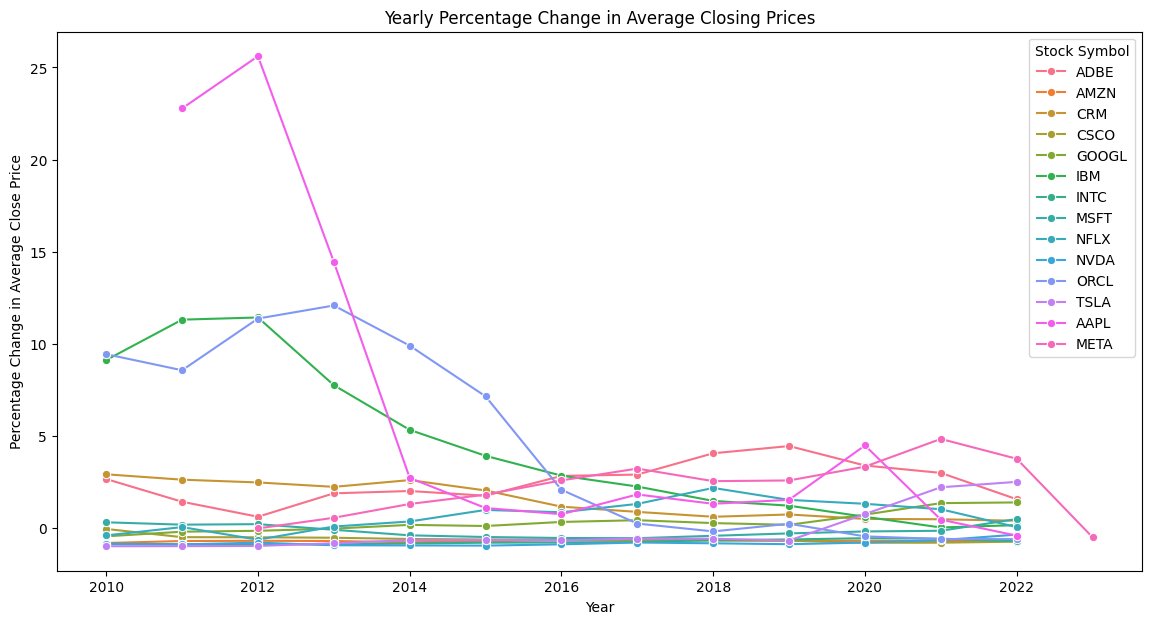

In [ ]:
# calculate the percentage changes of annual closing prices
yearly_price_change = stock_prices_df.groupby(['year', 'stock_symbol'])['close'].mean().pct_change().reset_index()
yearly_price_change = yearly_price_change.dropna()

# visualize annual performance
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_price_change, x='year', y='close', hue='stock_symbol', marker='o')
plt.title('Yearly Percentage Change in Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Average Close Price')
plt.legend(title='Stock Symbol')
plt.show()

**Chart: Hiển thị phần trăm thay đổi hàng năm của giá đóng cửa trung bình cho nhiều cổ phiếu khác nhau từ năm 2010 đến 2022.**
 + TSLA: Thay đổi phần trăm lớn và biến động mạnh mẽ, đặc biệt tăng đột biến vào các năm 2013-2014 và 2019-2021.
 + NFLX: Biến động lớn vào các năm 2010-2015, sau đó giảm dần.
 + NVDA: Thay đổi phần trăm lớn từ năm 2015 và đạt đỉnh vào khoảng năm 2018-2020.
 + META (Facebook): Thay đổi phần trăm khá lớn vào các năm 2012-2013 và 2019-2020.

# **Model Building**
## **1. ARIMA Model**

In [ ]:
# make a prediction with the ARIMA model
model = ARIMA(apple_stock['close'], order=(5, 1, 0))  # order parametresini veri setine göre ayarlayın
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               15632.559
Date:                Thu, 01 Aug 2024   AIC                         -31253.118
Time:                        07:59:28   BIC                         -31216.563
Sample:                             0   HQIC                        -31240.027
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.008     -7.056      0.000      -0.072      -0.041
ar.L2         -0.0281      0.008     -3.485      0.000      -0.044      -0.012
ar.L3         -0.0306      0.009     -3.392      0.0

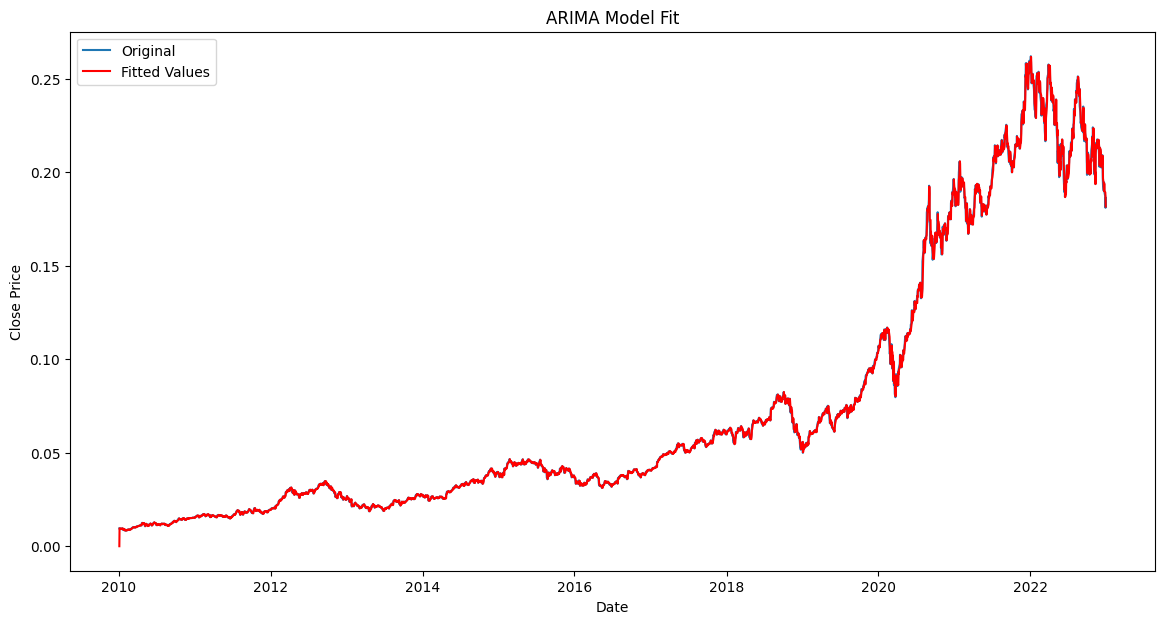

In [ ]:
# visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(apple_stock['close'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


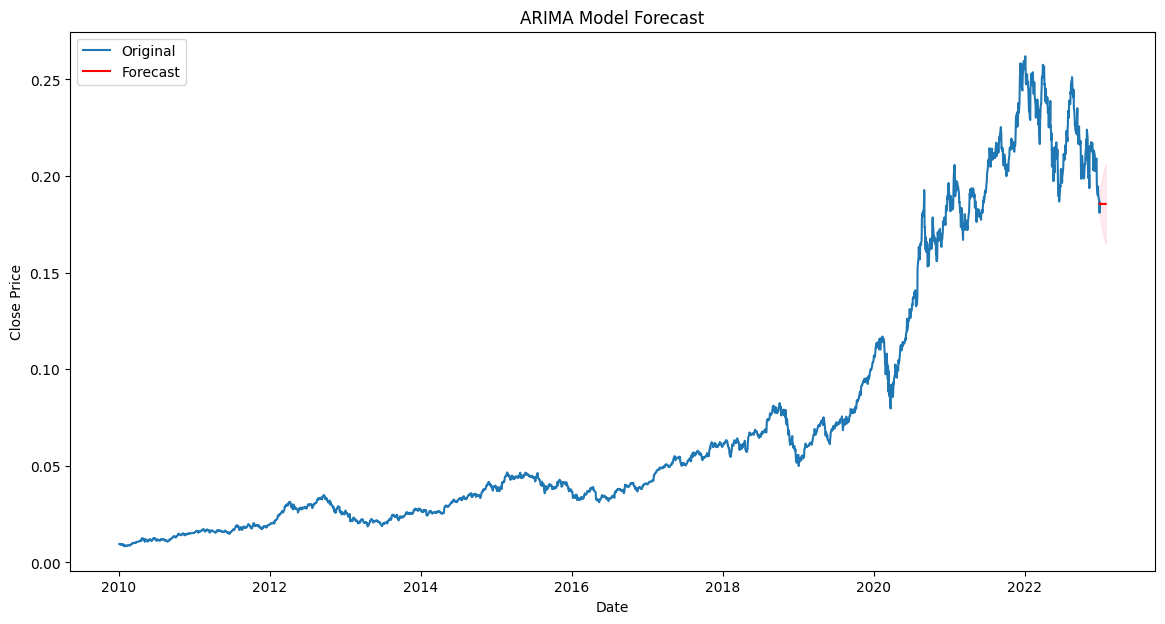

In [ ]:
# predict future closing prices
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=apple_stock.index[-1], periods=30, freq='D')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(apple_stock['close'], label='Original')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# get unique stock symbols
unique_symbols = stock_prices_df['stock_symbol'].unique()


### AAPL ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               15632.559
Date:                Thu, 01 Aug 2024   AIC                         -31253.118
Time:                        07:59:42   BIC                         -31216.563
Sample:                             0   HQIC                        -31240.027
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.008     -7.056      0.000      -0.072      -0.041
ar.L2         -0.0281      0.008     -3.485      0.000      -0.044      -0.012
ar.L3         -0.0306      0.009     -3.392      0.0

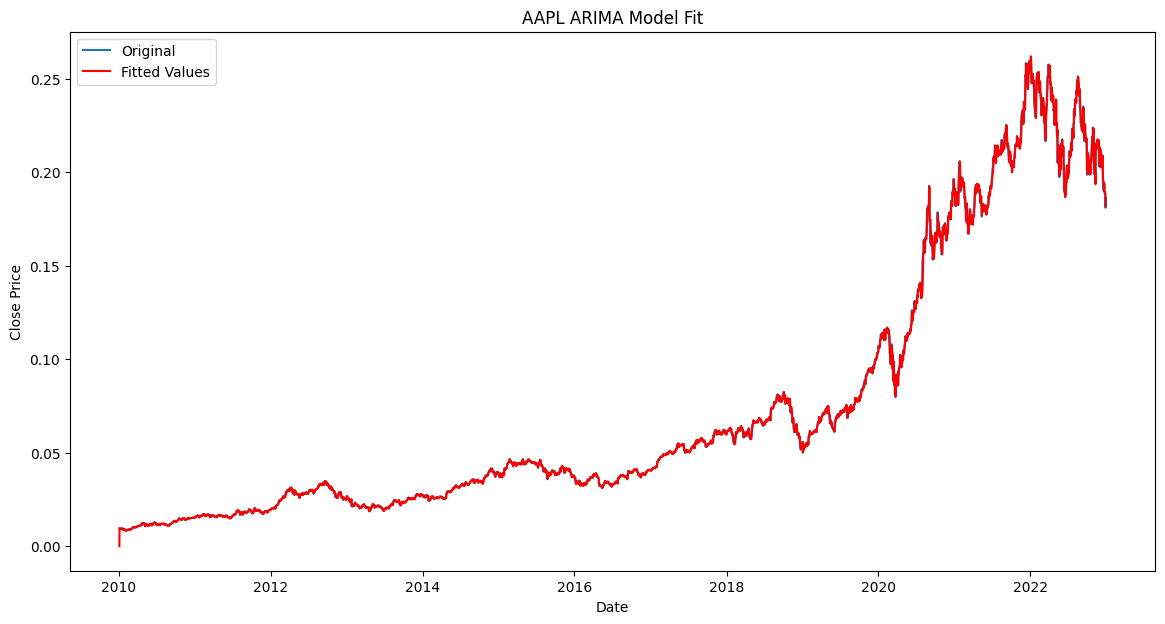

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


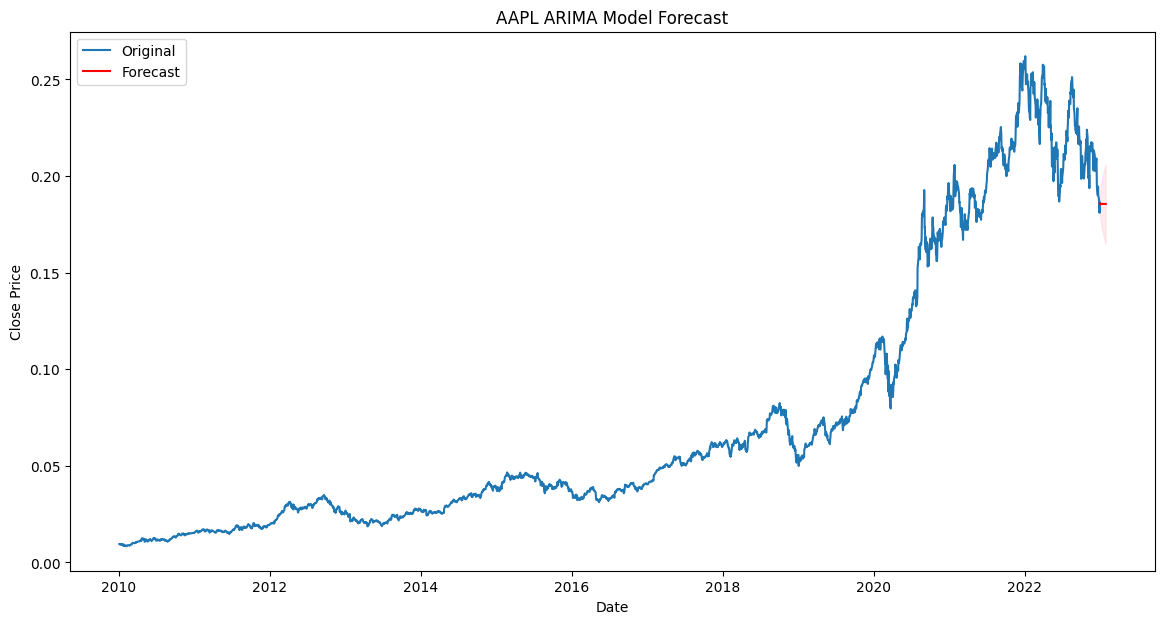


### ADBE ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               11048.237
Date:                Thu, 01 Aug 2024   AIC                         -22084.474
Time:                        07:59:43   BIC                         -22047.919
Sample:                             0   HQIC                        -22071.383
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1097      0.008    -14.600      0.000      -0.124      -0.095
ar.L2          0.0437      0.008      5.722      0.000       0.029       0.059
ar.L3         -0.0221      0.009     -2.498      0.0

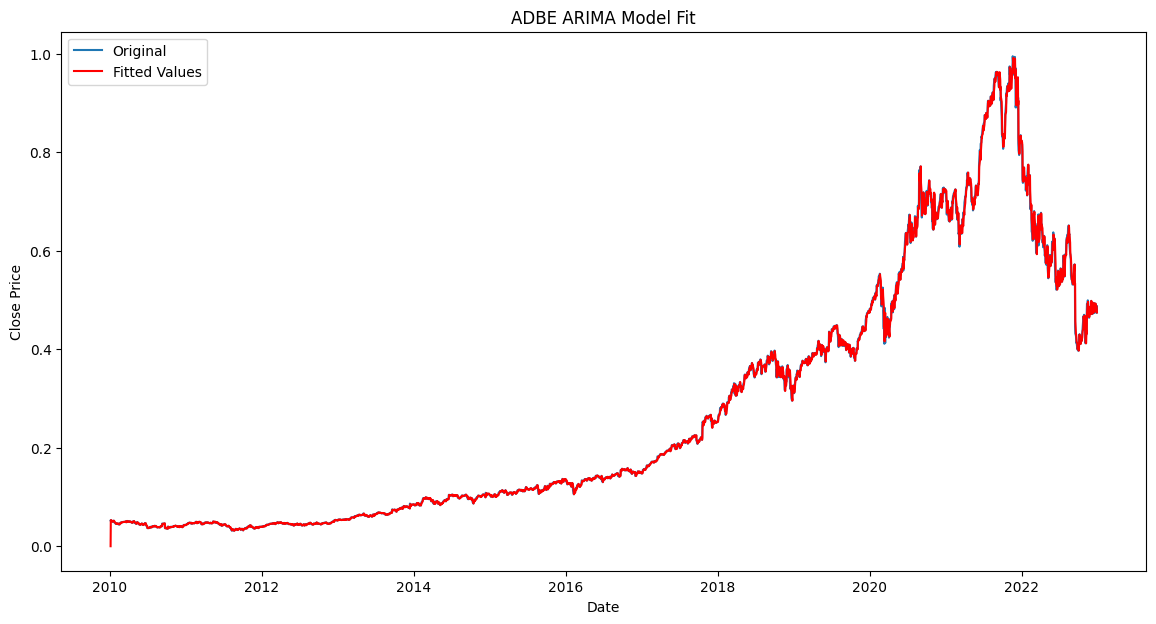

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


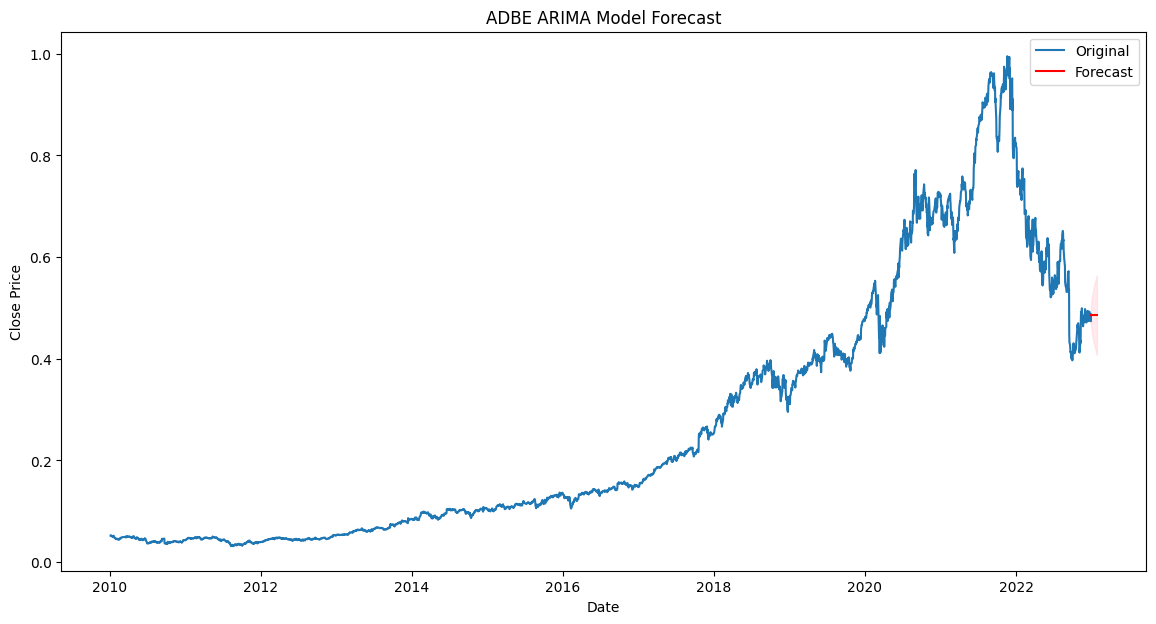


### AMZN ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               14961.040
Date:                Thu, 01 Aug 2024   AIC                         -29910.080
Time:                        07:59:45   BIC                         -29873.525
Sample:                             0   HQIC                        -29896.989
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0150      0.009     -1.715      0.086      -0.032       0.002
ar.L2          0.0231      0.010      2.359      0.018       0.004       0.042
ar.L3         -0.0448      0.009     -5.179      0.0

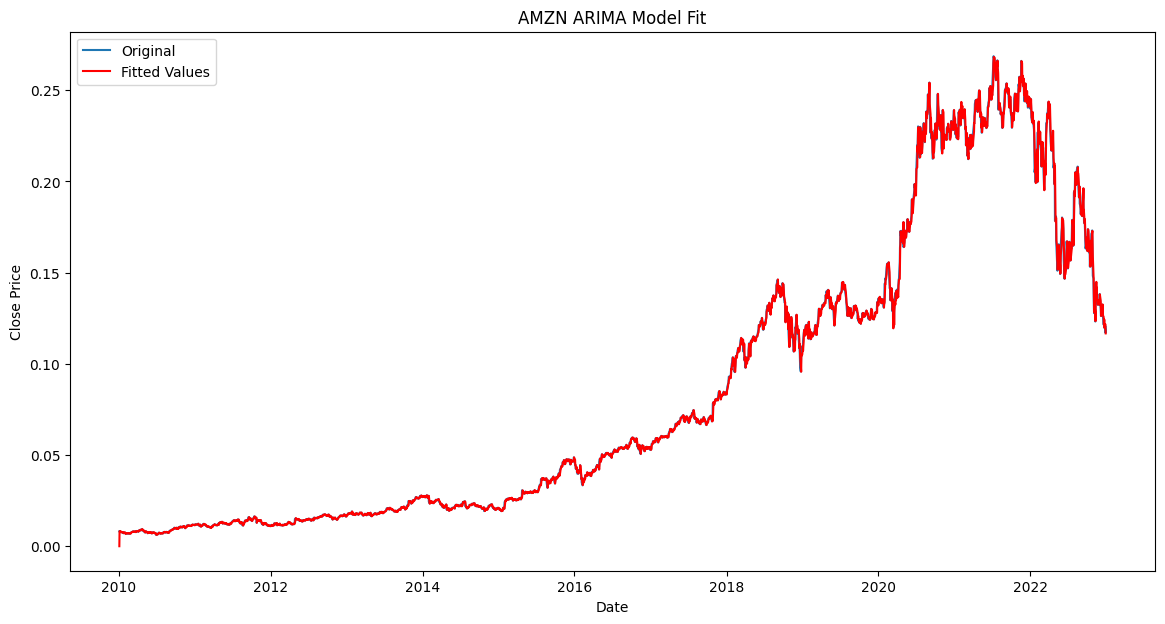

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


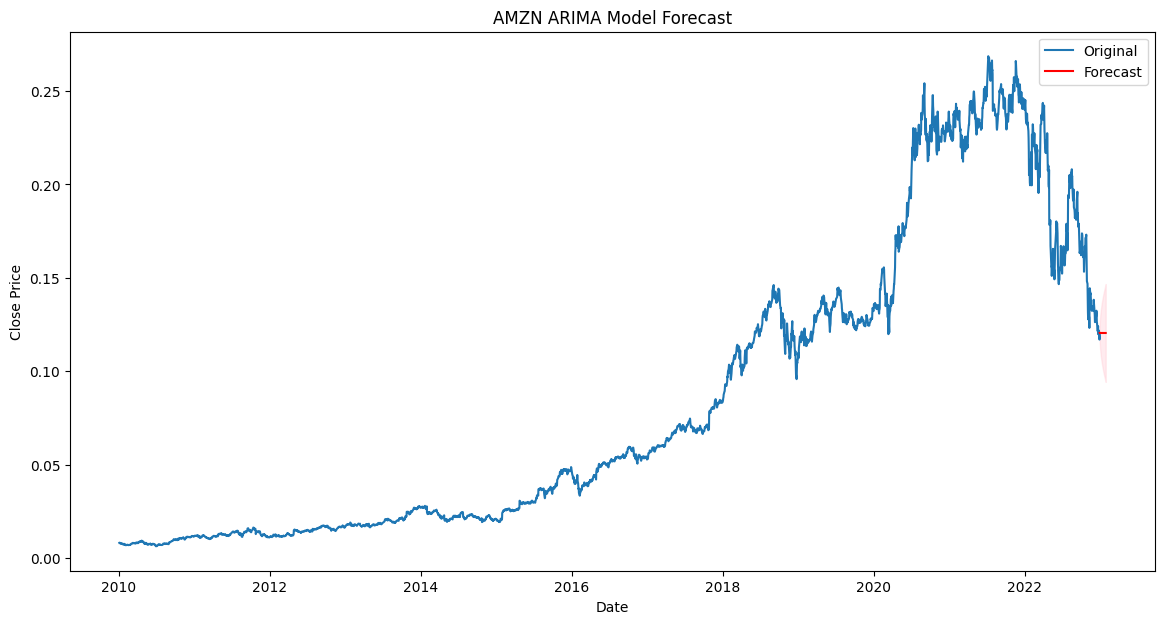


### CRM ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               13199.195
Date:                Thu, 01 Aug 2024   AIC                         -26386.390
Time:                        07:59:48   BIC                         -26349.835
Sample:                             0   HQIC                        -26373.299
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      0.009     -0.546      0.585      -0.023       0.013
ar.L2         -0.0080      0.010     -0.836      0.403      -0.027       0.011
ar.L3         -0.0139      0.011     -1.251      0.2

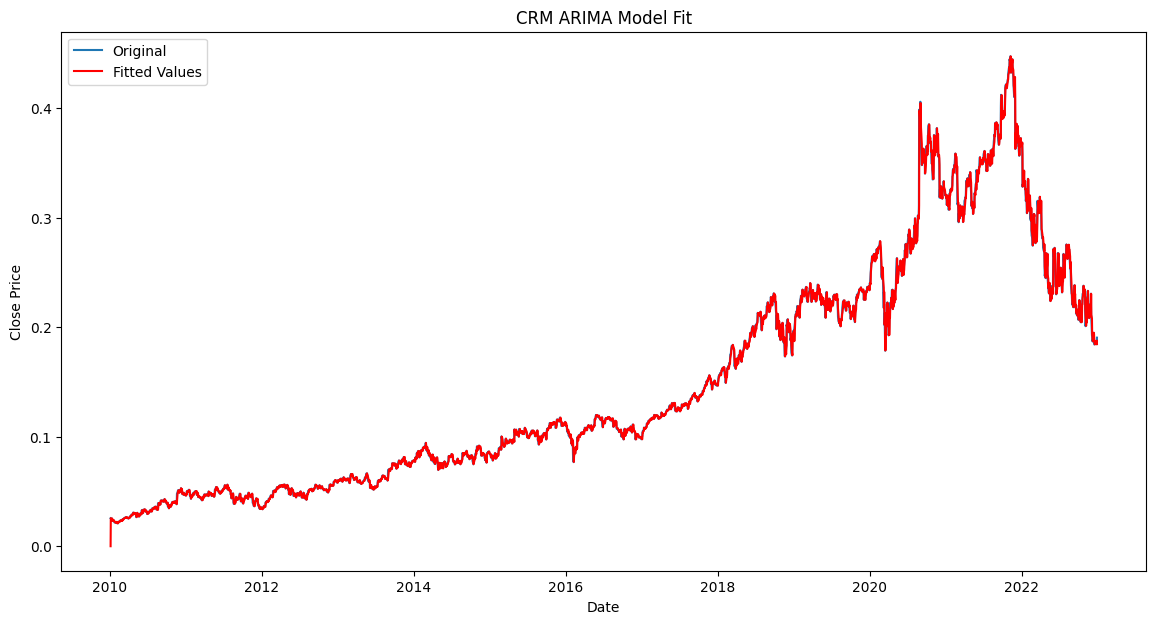

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


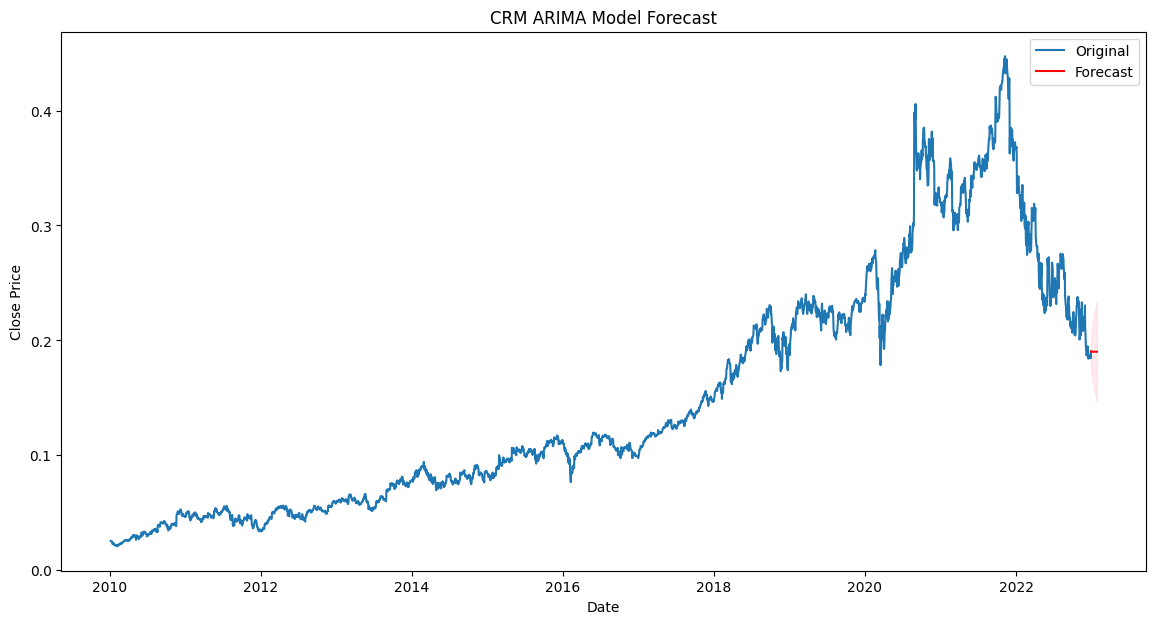


### CSCO ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               18469.329
Date:                Thu, 01 Aug 2024   AIC                         -36926.659
Time:                        07:59:50   BIC                         -36890.103
Sample:                             0   HQIC                        -36913.567
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0803      0.009     -8.999      0.000      -0.098      -0.063
ar.L2         -0.0087      0.010     -0.857      0.392      -0.029       0.011
ar.L3          0.0043      0.012      0.372      0.7

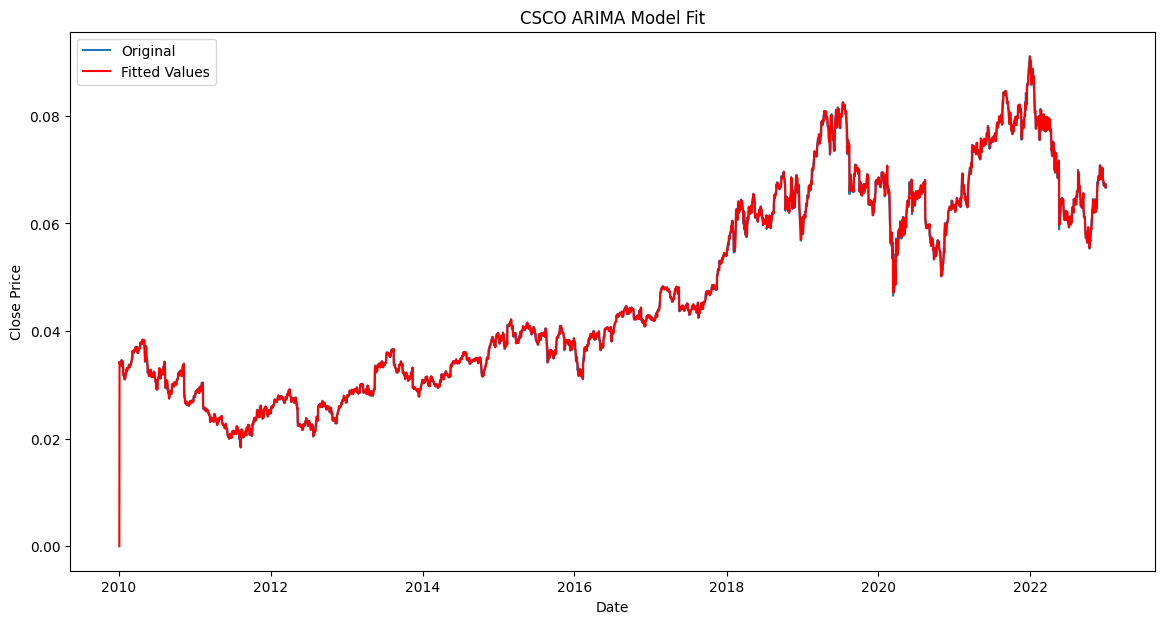

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


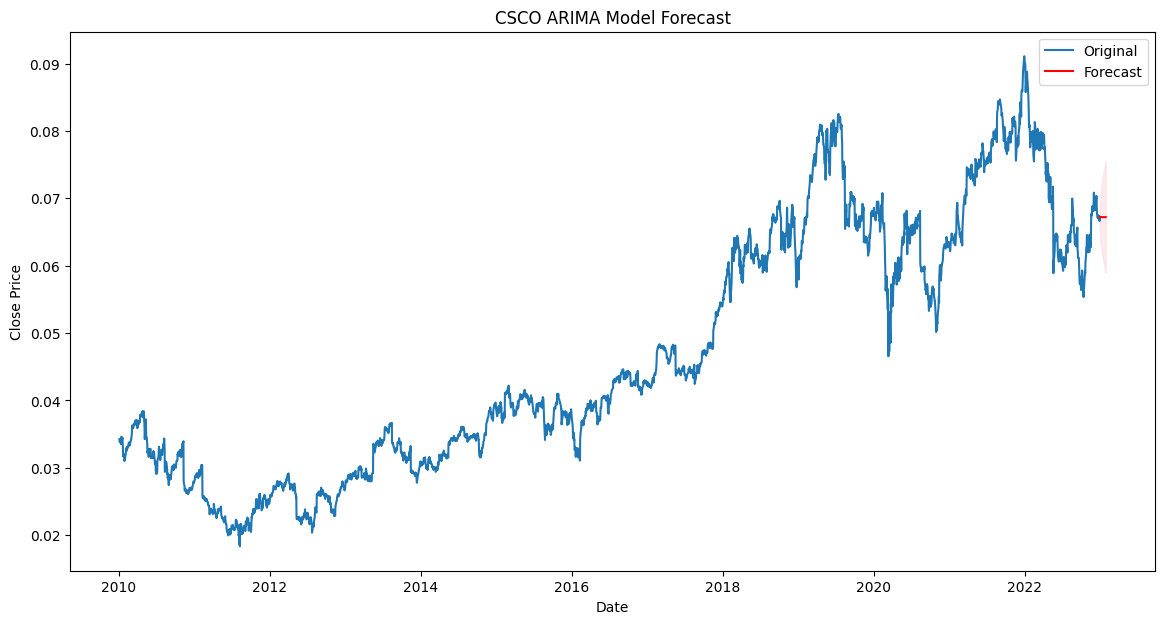


### GOOGL ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               16351.534
Date:                Thu, 01 Aug 2024   AIC                         -32691.067
Time:                        07:59:56   BIC                         -32654.512
Sample:                             0   HQIC                        -32677.976
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0599      0.009     -6.680      0.000      -0.077      -0.042
ar.L2         -0.0074      0.009     -0.835      0.404      -0.025       0.010
ar.L3         -0.0457      0.008     -5.745      0.0

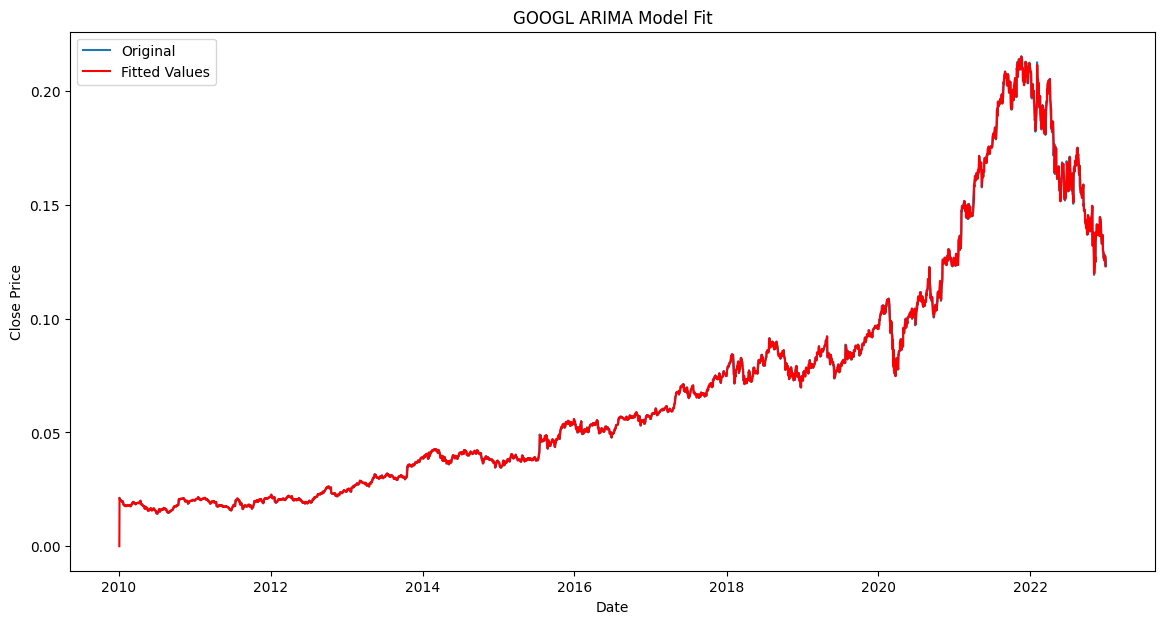

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


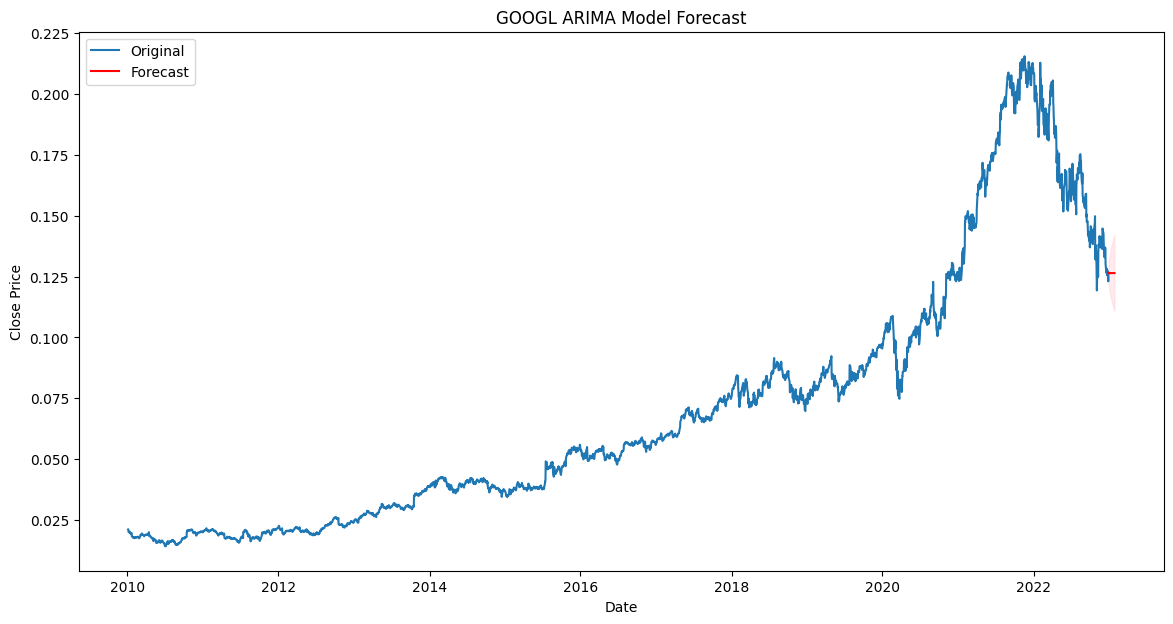


### IBM ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               14471.423
Date:                Thu, 01 Aug 2024   AIC                         -28930.845
Time:                        08:00:00   BIC                         -28894.290
Sample:                             0   HQIC                        -28917.754
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0131      0.014     -0.962      0.336      -0.040       0.014
ar.L2          0.0099      0.013      0.771      0.440      -0.015       0.035
ar.L3         -0.0163      0.013     -1.235      0.2

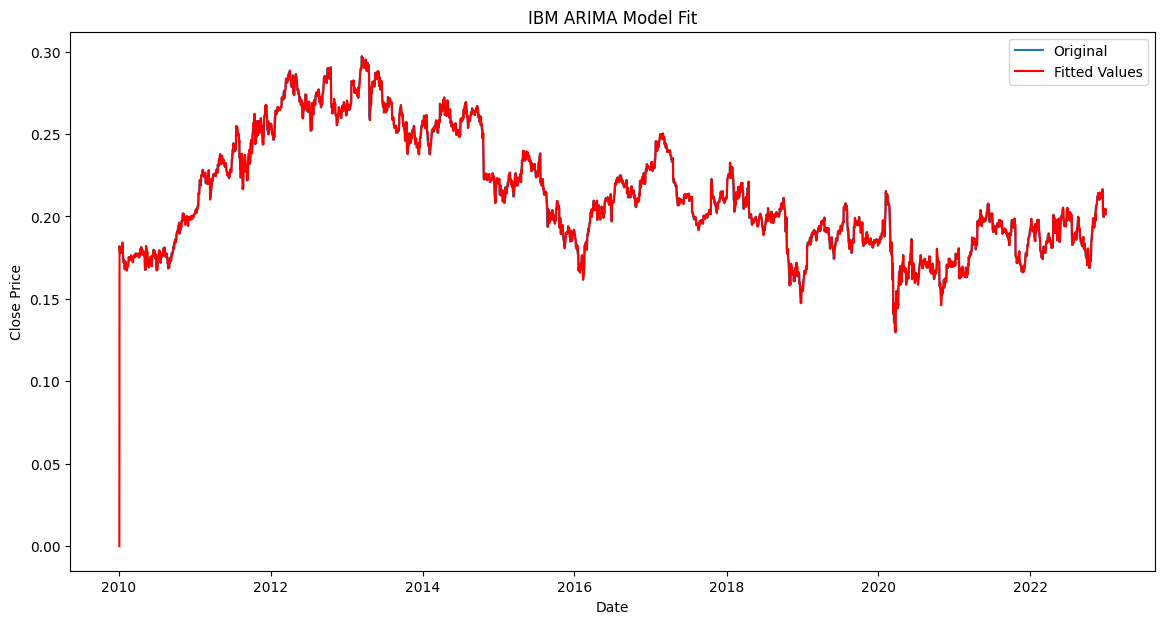

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


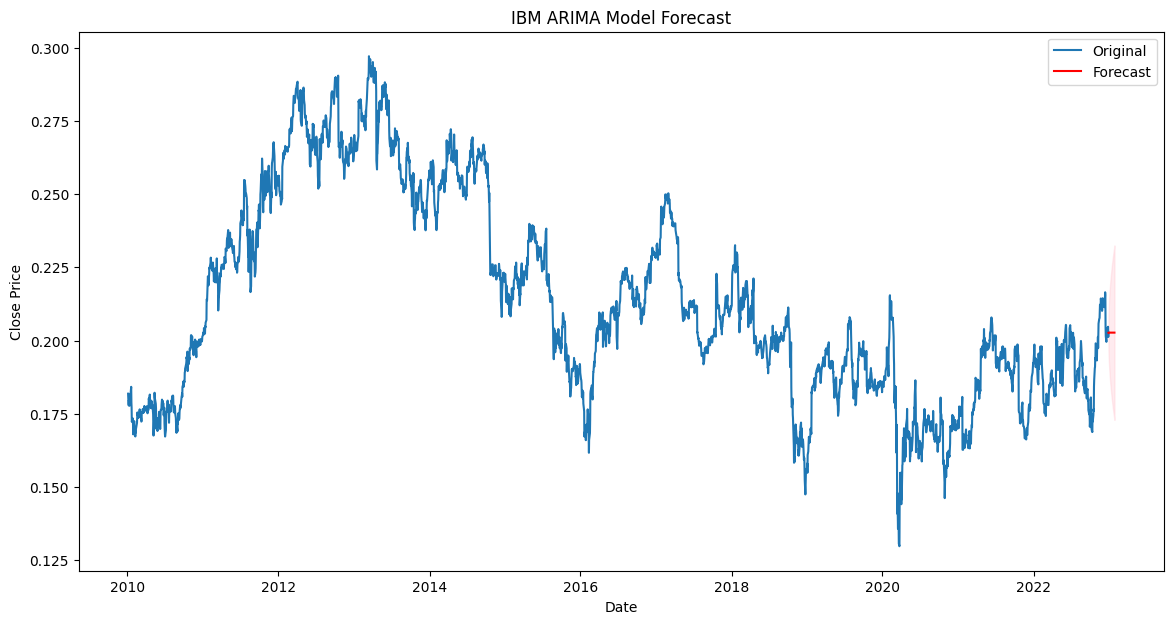


### INTC ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               17472.372
Date:                Thu, 01 Aug 2024   AIC                         -34932.745
Time:                        08:00:04   BIC                         -34896.190
Sample:                             0   HQIC                        -34919.654
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1599      0.007    -21.628      0.000      -0.174      -0.145
ar.L2          0.0588      0.010      5.801      0.000       0.039       0.079
ar.L3          0.0455      0.010      4.400      0.0

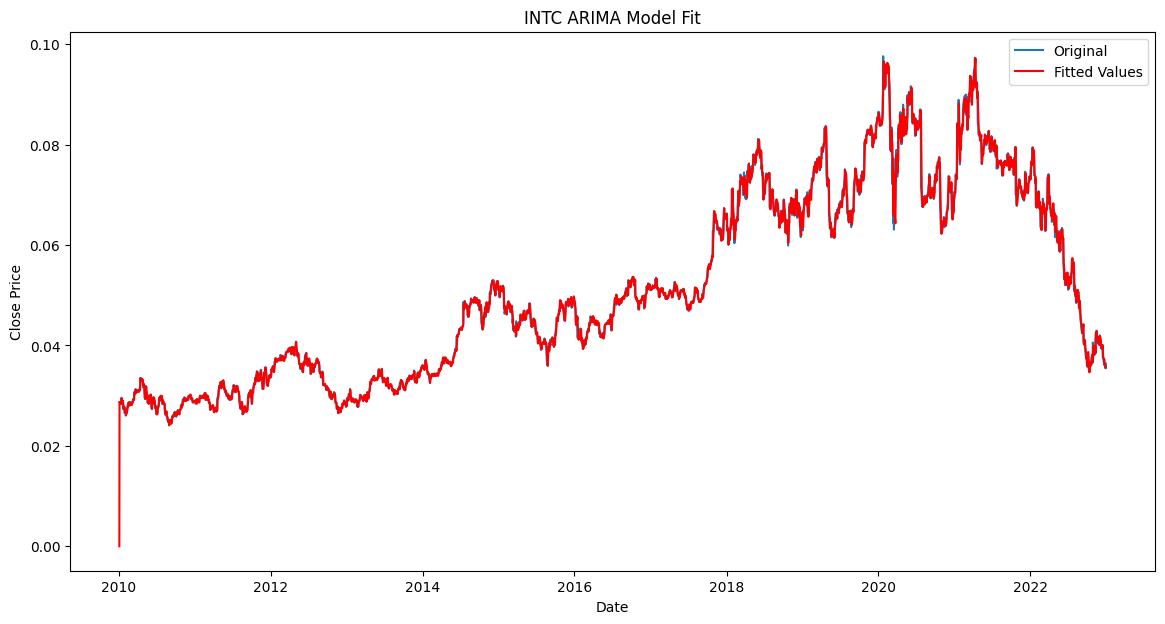

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


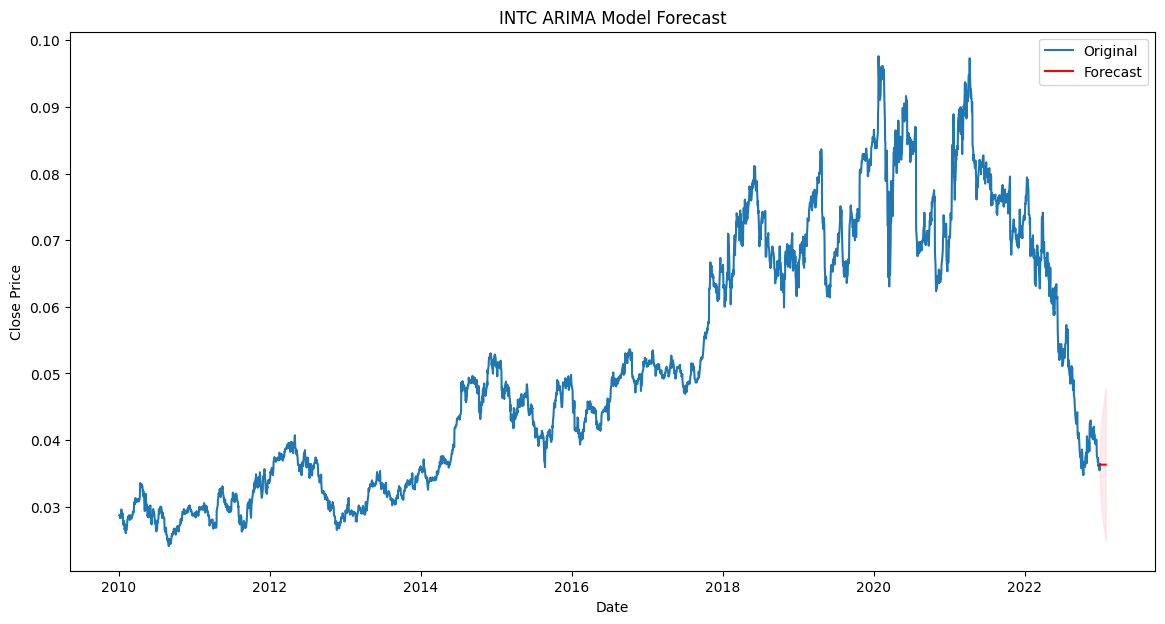


### META ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2688
Model:                 ARIMA(5, 1, 0)   Log Likelihood                9941.113
Date:                Thu, 01 Aug 2024   AIC                         -19870.226
Time:                        08:00:06   BIC                         -19834.849
Sample:                             0   HQIC                        -19857.430
                               - 2688                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0461      0.014     -3.189      0.001      -0.074      -0.018
ar.L2          0.0153      0.012      1.304      0.192      -0.008       0.038
ar.L3         -0.0589      0.012     -4.871      0.0

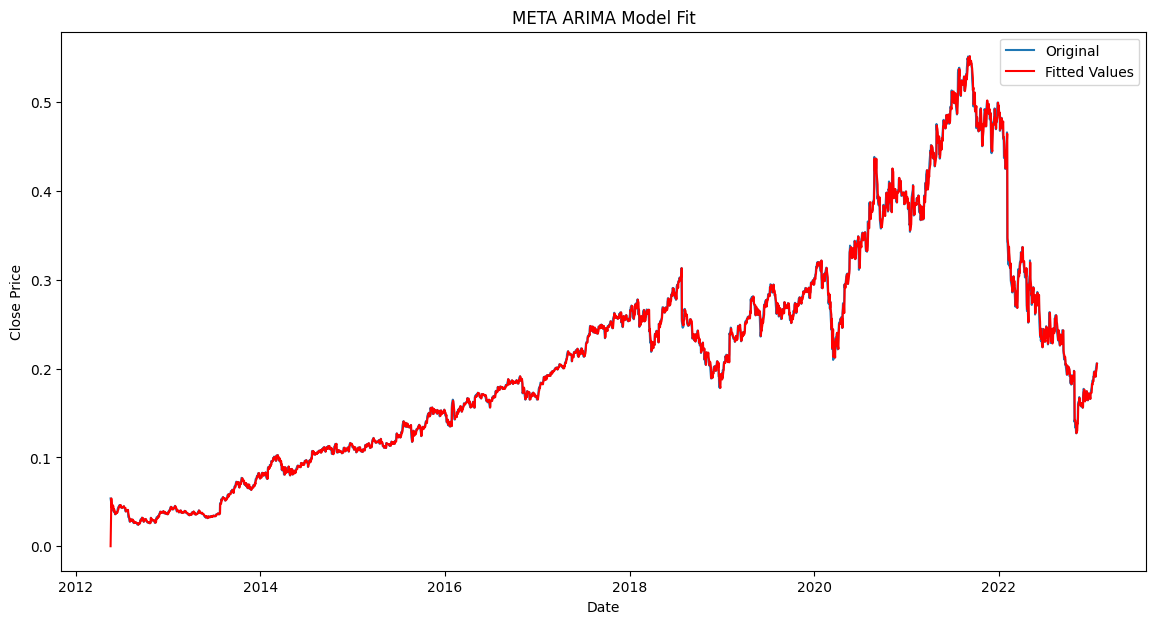

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


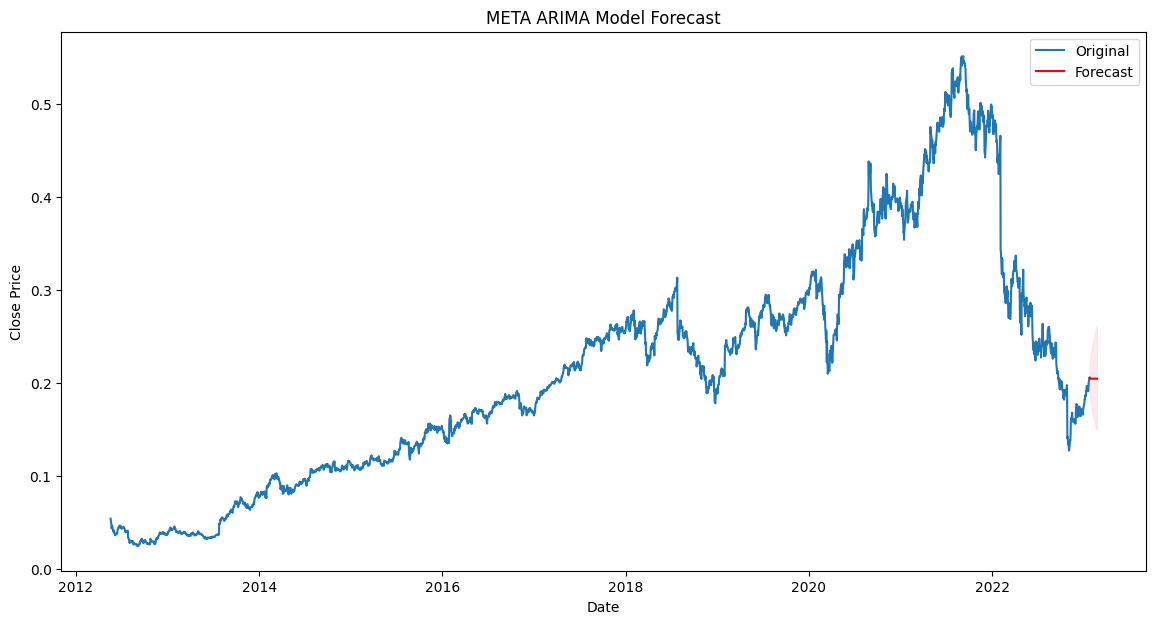


### MSFT ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               13803.474
Date:                Thu, 01 Aug 2024   AIC                         -27594.947
Time:                        08:00:12   BIC                         -27558.392
Sample:                             0   HQIC                        -27581.856
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1238      0.008    -16.343      0.000      -0.139      -0.109
ar.L2         -0.0078      0.008     -1.023      0.307      -0.023       0.007
ar.L3         -0.0350      0.009     -4.098      0.0

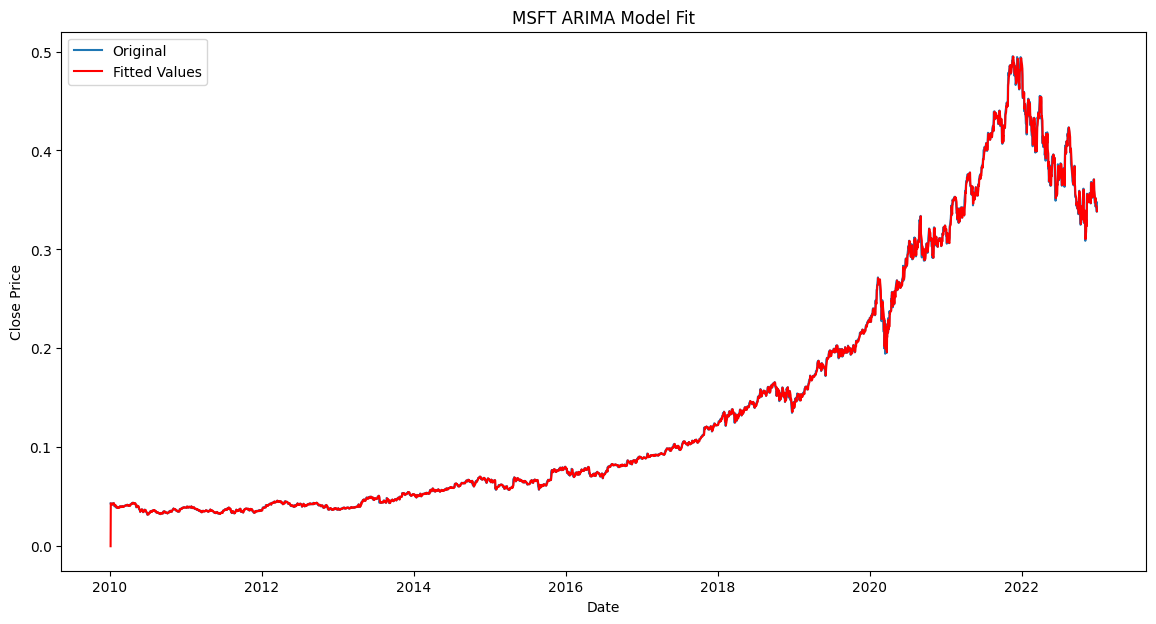

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


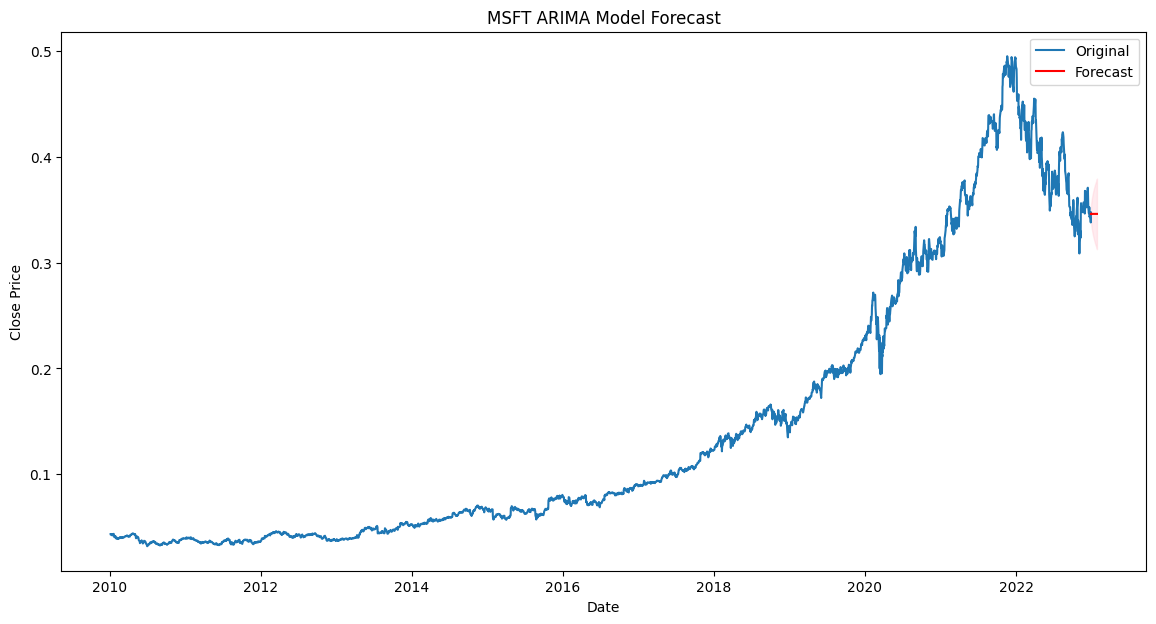


### NFLX ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               10339.164
Date:                Thu, 01 Aug 2024   AIC                         -20666.328
Time:                        08:00:14   BIC                         -20629.773
Sample:                             0   HQIC                        -20653.237
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0341      0.011     -3.233      0.001      -0.055      -0.013
ar.L2          0.0230      0.010      2.271      0.023       0.003       0.043
ar.L3          0.0123      0.012      1.024      0.3

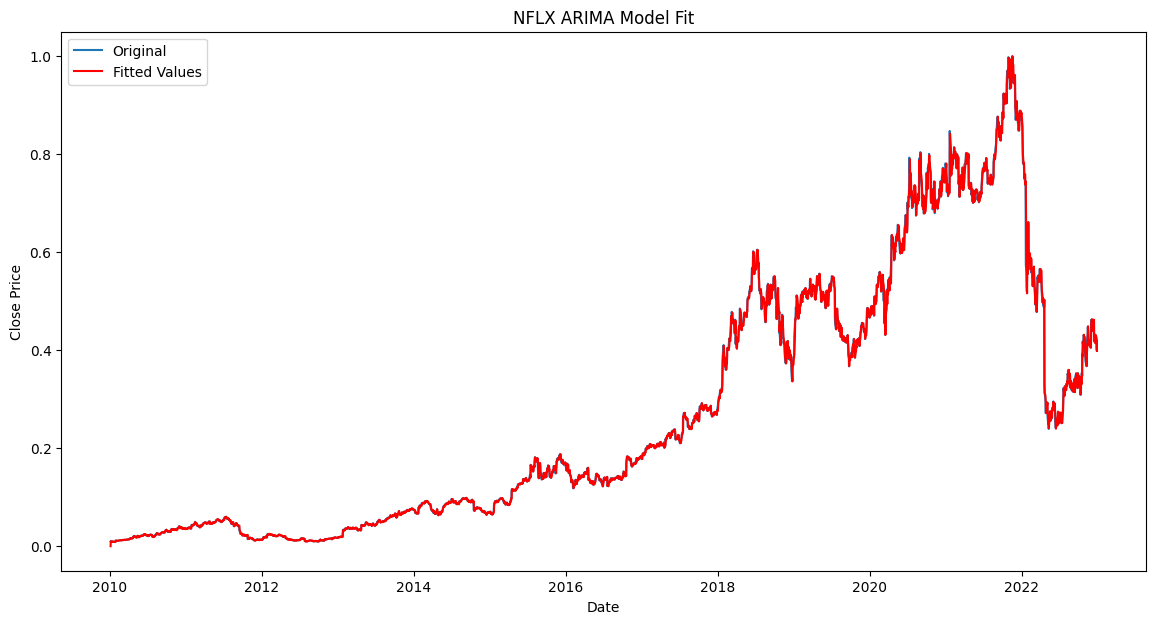

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


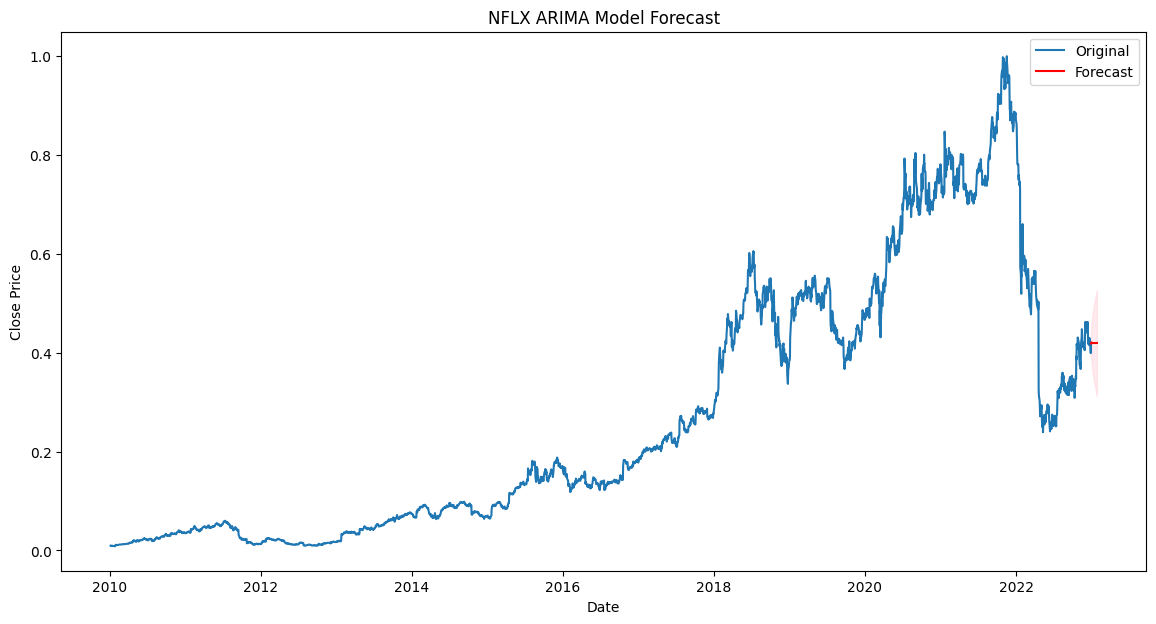


### NVDA ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               13221.293
Date:                Thu, 01 Aug 2024   AIC                         -26430.586
Time:                        08:00:17   BIC                         -26394.031
Sample:                             0   HQIC                        -26417.495
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0429      0.007     -5.851      0.000      -0.057      -0.029
ar.L2         -0.0295      0.006     -4.983      0.000      -0.041      -0.018
ar.L3          0.0204      0.007      2.810      0.0

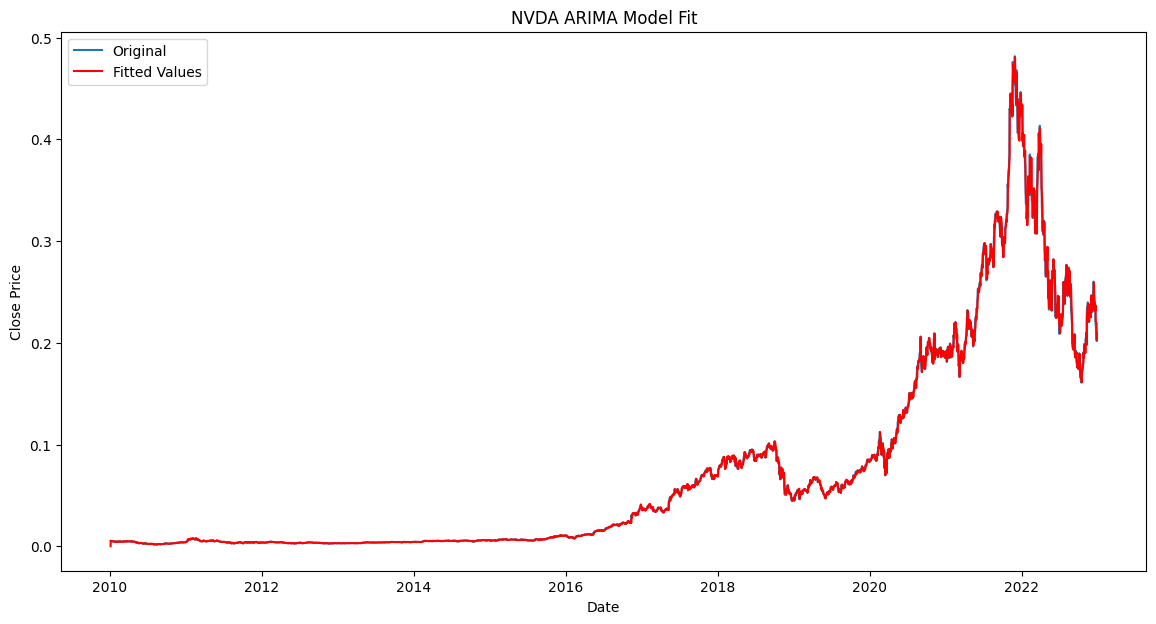

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


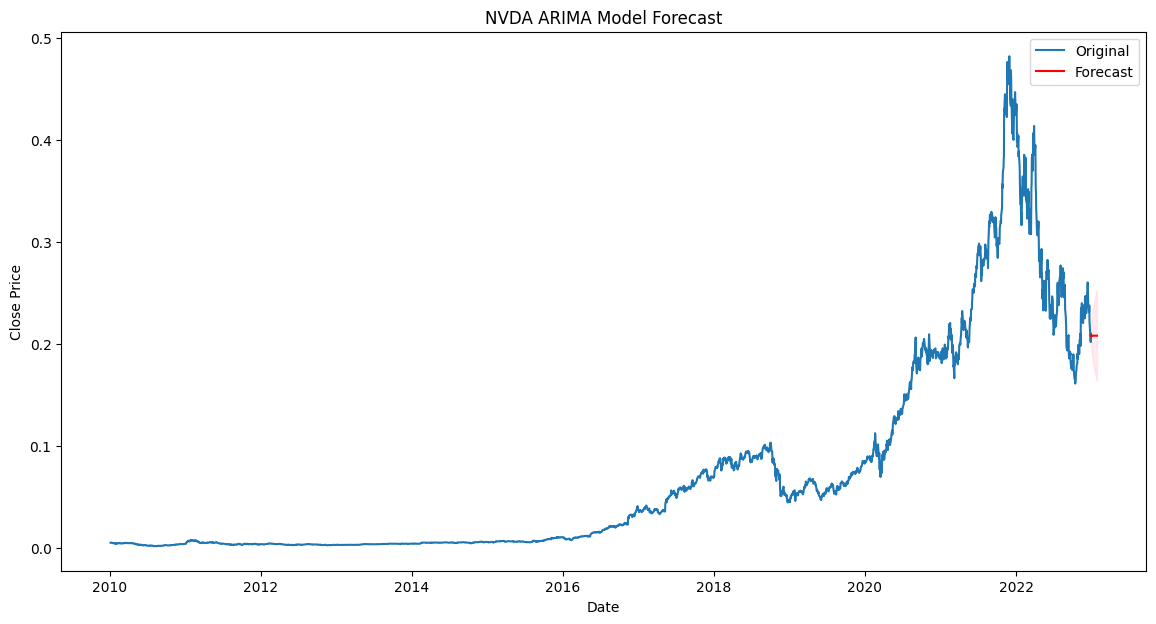


### ORCL ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               17355.300
Date:                Thu, 01 Aug 2024   AIC                         -34698.600
Time:                        08:00:20   BIC                         -34662.045
Sample:                             0   HQIC                        -34685.509
                               - 3271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0591      0.009     -6.910      0.000      -0.076      -0.042
ar.L2         -0.0131      0.010     -1.338      0.181      -0.032       0.006
ar.L3          0.0080      0.009      0.915      0.3

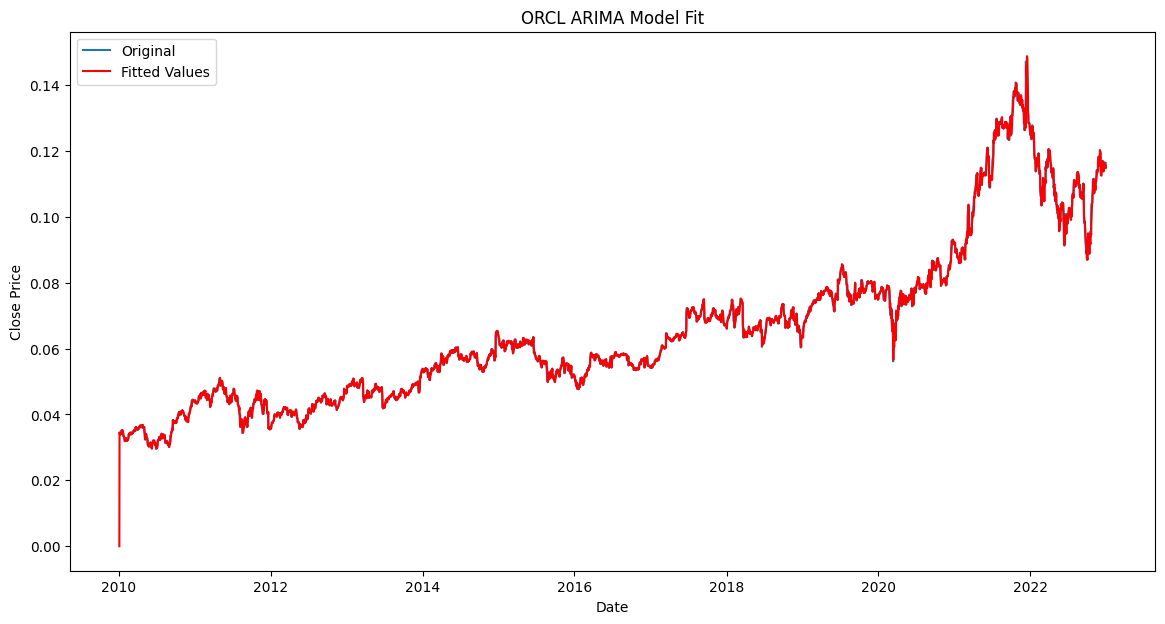

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


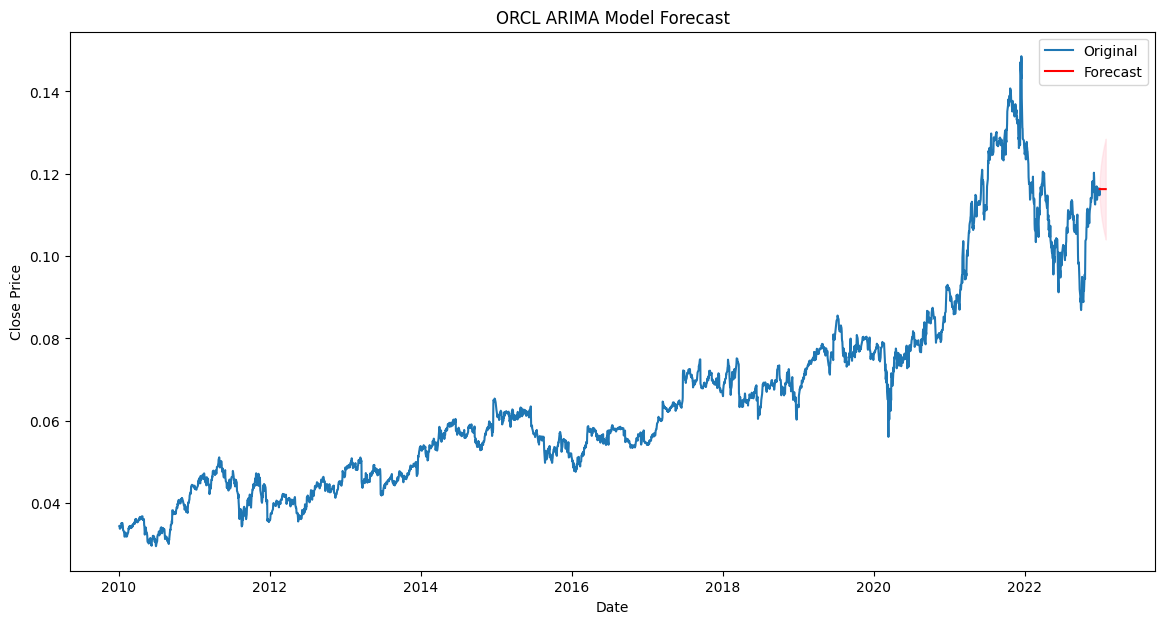


### TSLA ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3148
Model:                 ARIMA(5, 1, 0)   Log Likelihood               11443.610
Date:                Thu, 01 Aug 2024   AIC                         -22875.221
Time:                        08:00:24   BIC                         -22838.895
Sample:                             0   HQIC                        -22862.186
                               - 3148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0364      0.008     -4.707      0.000      -0.052      -0.021
ar.L2          0.0172      0.007      2.612      0.009       0.004       0.030
ar.L3         -0.0010      0.009     -0.113      0.9

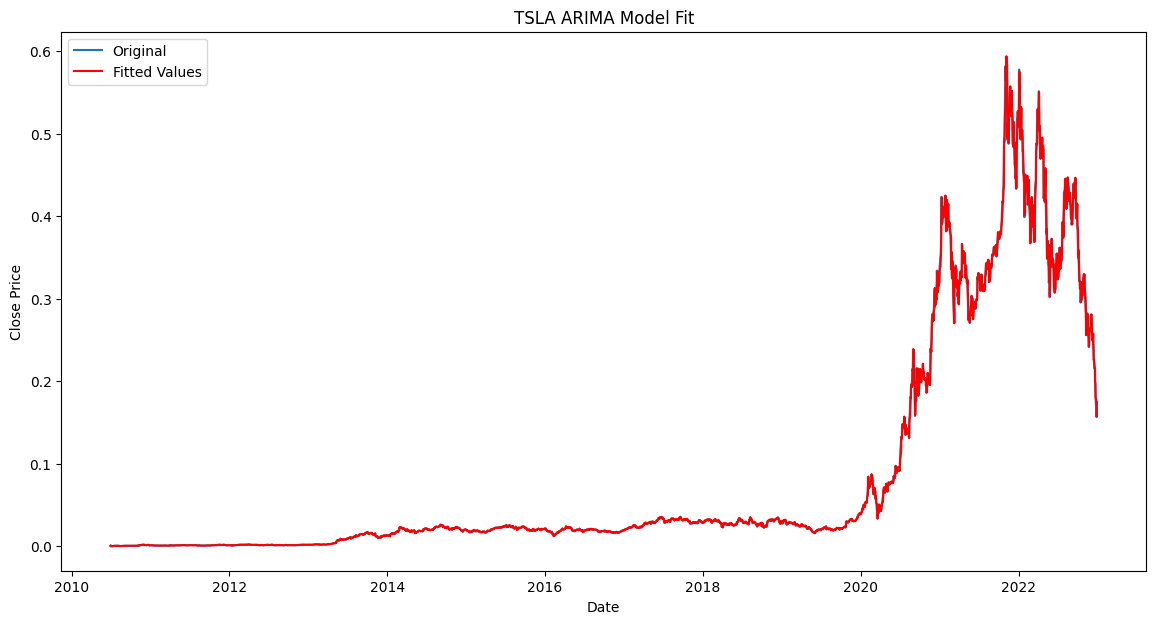

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


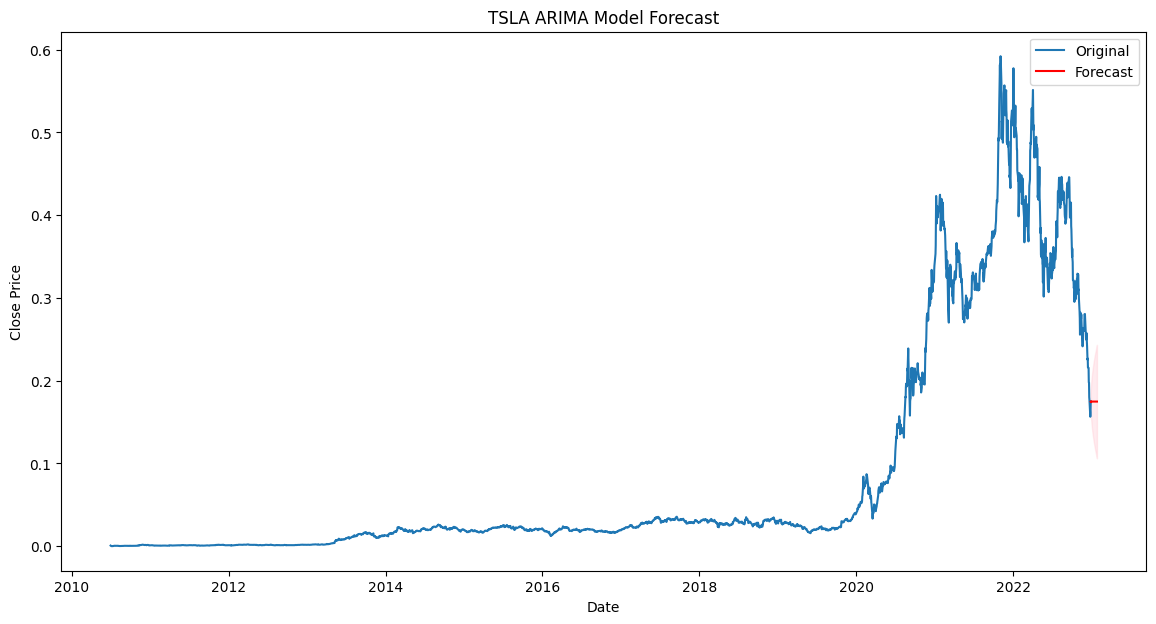

In [ ]:
# time series analysis for each stock
for symbol in unique_symbols:
    stock_data = stock_prices_df[stock_prices_df['stock_symbol'] == symbol]
    stock_data.set_index('date', inplace=True)

    print(f"\n### {symbol} ###")

    # make a prediction with the ARIMA model
    model = ARIMA(stock_data['close'], order=(5, 1, 0))  # order parametresini veri setine göre ayarlayın
    model_fit = model.fit()
    print(model_fit.summary())

    # visualize the predictions
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['close'], label='Original')
    plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
    plt.title(f'{symbol} ARIMA Model Fit')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # predict future closing prices
    forecast = model_fit.get_forecast(steps=30)
    forecast_index = pd.date_range(start=stock_data.index[-1], periods=30, freq='D')
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['close'], label='Original')
    plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'{symbol} ARIMA Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

## **2. Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Prepare the data for modeling
X = stock_prices_df[['open', 'high', 'low', 'volume']]
y = stock_prices_df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
LN_model = LinearRegression()
LN_model.fit(X_train, y_train)

# Make predictions
y_pred_LN = LN_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_LN)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_LN)
r2 = r2_score(y_test, y_pred_LN)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.887451110720118e-06
Root Mean Squared Error: 0.0016992501613123708
Mean Absolute Error: 0.0007400411381147923
R-squared: 0.9998722419528762


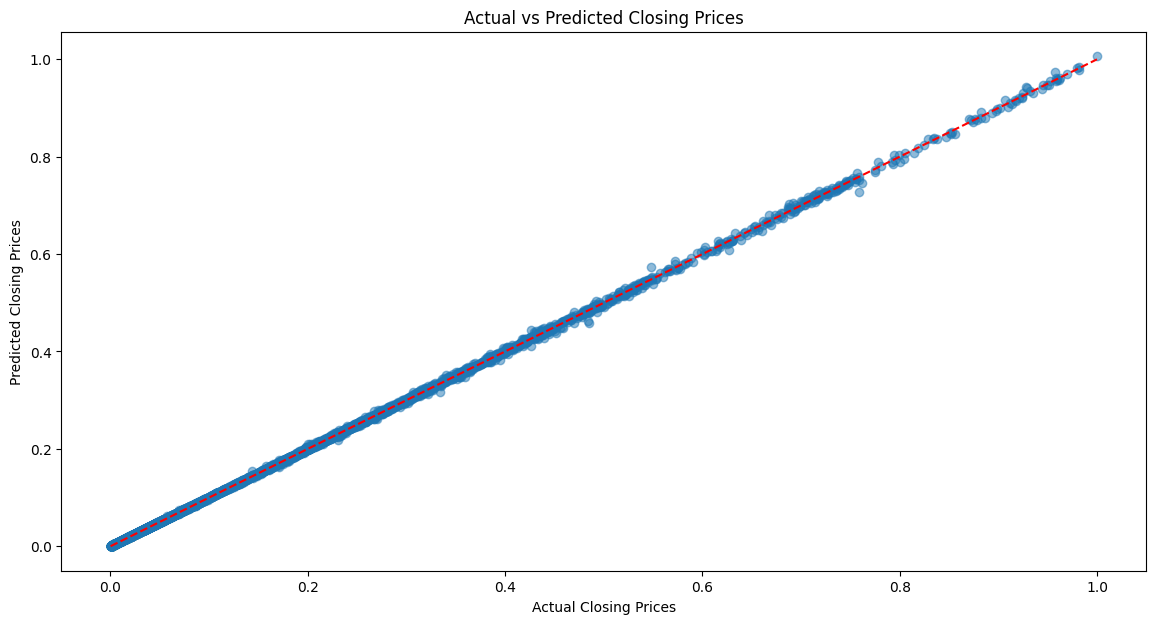

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_LN, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.show()

**1. Hiệu Suất Model:**

 + Mean Squared Error (MSE): Giá trị MSE rất nhỏ (2.887451110720118e-06) cho thấy mô hình dự đoán khá chính xác, với sai số bình phương trung bình rất thấp.
 + Root Mean Squared Error (RMSE): Giá trị RMSE là 0.0016992501613123708 cũng rất nhỏ, cho thấy mô hình dự đoán rất chính xác và sai số trung bình là rất nhỏ.
 + Mean Absolute Error (MAE): Giá trị MAE là 0.0007400411381147923 cũng rất nhỏ, cho thấy sai số tuyệt đối trung bình giữa dự đoán và thực tế là rất thấp, thể hiện sự chính xác của mô hình.
 + R-squared (R²): Giá trị R² rất cao (0.9998722419528762) gần bằng 1, cho thấy mô hình giải thích gần như toàn bộ sự biến thiên của dữ liệu. Đây là một chỉ số rất tốt, thể hiện mô hình có khả năng dự đoán chính xác và hiệu quả.


**Tổng kết**: *Các chỉ số trên cho thấy mô hình hồi quy này có hiệu quả rất cao trong việc dự đoán dữ liệu, với sai số rất nhỏ và khả năng giải thích hầu như toàn bộ sự biến thiên của dữ liệu thực*


**2. Diễn Giải Biểu Đồ:**

 + Biểu đồ phân tán của giá đóng cửa thực tế so với giá trị dự đoán cho thấy các điểm nằm rất gần đường gạch đỏ (y = x), cho thấy các dự đoán của mô hình khớp rất tốt với giá trị thực tế.

## **3. Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [ ]:
# Khởi tạo mô hình Random Forest
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Tạo dữ liệu mẫu với đầu vào liên tục và nhãn là dạng rời rạc
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# huấn luyện mô hình RandomForestClassifier
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Đánh giá độ chính xác của mô hình trên tập kiểm tra
accuracy = RF_model.score(X_test, y_test)
print(f'Accuracy of RandomForestClassifier: {accuracy:.2f}')

Accuracy of RandomForestClassifier: 0.94


In [ ]:
# Dự đoán giá trị
y_pred_RF = RF_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Tính các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_RF)
r2 = r2_score(y_test, y_pred_RF)

# In các chỉ số đánh giá
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.055
Root Mean Squared Error: 0.2345207879911715
Mean Absolute Error: 0.055
R-squared: 0.77997799779978


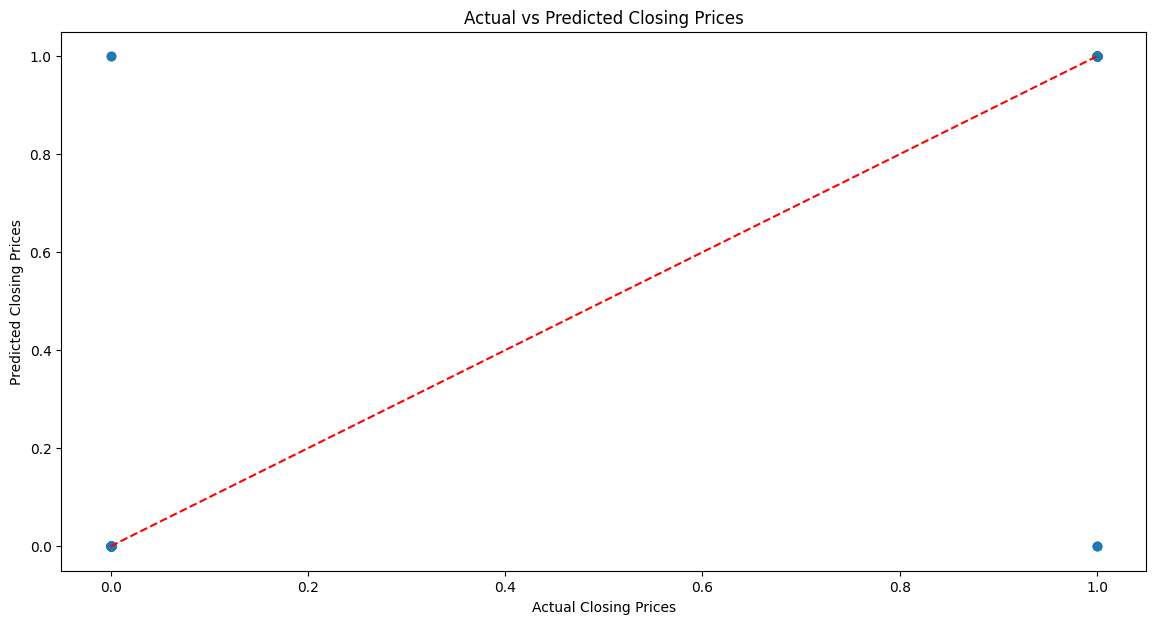

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_RF, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.show()

1. **Hiệu Suất Model:**
+ Mean Squared Error (MSE): Giá trị MSE là 0.055 cho thấy trung bình bình phương sai số giữa giá trị dự đoán và giá trị thực là 0.055. Mặc dù giá trị này không phải là quá cao, nó vẫn cho thấy rằng mô hình có một mức độ sai số nhất định trong dự đoán.
+ Root Mean Squared Error (RMSE): Giá trị RMSE là 0.2345207879911715, thể hiện sai số trung bình của dự đoán so với giá trị thực là khoảng 0.2345. RMSE cung cấp thông tin về độ lệch chuẩn của sai số, và giá trị này cho thấy sai số của mô hình không quá lớn nhưng vẫn cần cải thiện.
+ Mean Absolute Error (MAE): Giá trị MAE là 0.055, cho thấy sai số tuyệt đối trung bình giữa dự đoán và thực tế là 0.055. Điều này cho thấy mô hình có độ chính xác tương đối, nhưng vẫn có một khoảng cách giữa giá trị dự đoán và giá trị thực.
+ Giá trị R² là 0.77997799779978, nghĩa là mô hình giải thích được khoảng 78% sự biến thiên của dữ liệu thực. Mặc dù đây là một giá trị khá tốt, nó cho thấy còn khoảng 22% sự biến thiên chưa được mô hình giải thích, nghĩa là mô hình vẫn có thể được cải thiện để dự đoán chính xác hơn.

**Tổng kết:** *Các chỉ số trên cho thấy mô hình này có khả năng dự đoán tương đối tốt, nhưng vẫn còn khoảng cách giữa giá trị dự đoán và giá trị thực. Đặc biệt, MSE và MAE đều là 0.055, cho thấy có một mức độ sai số nhất định. Giá trị R² là gần 0.78 cho thấy mô hình giải thích được phần lớn sự biến thiên của dữ liệu, nhưng vẫn còn không gian để cải thiện hiệu suất của mô hình.*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10]
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Thực hiện Grid Search
grid_search.fit(X_train, y_train)

# In các tham số tốt nhất
print(f"Best parameters found: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [ ]:
# Hiển thị biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual', color='b')
plt.plot(y_pred_RF, label='Predicted', color='g')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price using Random Forest')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1400x600 with 0 Axes>

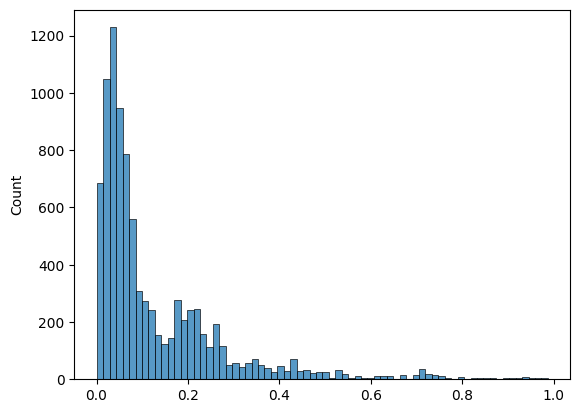

In [ ]:

sns.histplot(y_pred)
plt.show()

In [ ]:

# đánh giá model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}, MSE: {rf_mse}, R2: {rf_r2}")

Random Forest MAE: 0.0008314158262742522, MSE: 4.008712635183842e-06, R2: 0.9998226306600134


=> **Random Forest Regression: Hoạt động tốt với ít lỗi và điểm R² cao.**

## **4. Gradient Boosting**

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Prepare the data for modeling
X = stock_prices_df[['open', 'high', 'low', 'volume']]
y = stock_prices_df['close']

In [ ]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gradient Boosting model
GB_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict
y_pred = gb_model.predict(X_test)

In [ ]:
# Calculate evaluation indexes
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.31411544253504e-06
Root Mean Squared Error: 0.0027044621355336146
Mean Absolute Error: 0.001422611864772455
R-squared: 0.9996763799387259


**1.Hiệu Suất Model:**
+ Mean Squared Error (MSE): Giá trị MSE là 7.31411544253504e-06 rất nhỏ, cho thấy trung bình bình phương sai số giữa giá trị thực và giá trị dự đoán là rất thấp. Điều này chỉ ra rằng mô hình dự đoán khá chính xác.
+ Root Mean Squared Error (RMSE): Giá trị RMSE là 0.0027044621355336146 cũng rất nhỏ, thể hiện sai số trung bình của dự đoán so với giá trị thực là khoảng 0.0027. RMSE cung cấp một thước đo lỗi dễ hiểu và giá trị này cho thấy mô hình có sai số nhỏ và độ chính xác cao.
+ Mean Absolute Error (MAE): Giá trị MAE là 0.001422611864772455 cũng rất nhỏ, cho thấy sai số tuyệt đối trung bình giữa dự đoán và thực tế là rất thấp. Điều này phản ánh rằng mô hình có độ chính xác tốt trong việc dự đoán.
+ R-squared (R²): Giá trị R² là 0.9996763799387259 rất cao, gần bằng 1, cho thấy mô hình giải thích gần như toàn bộ sự biến thiên của dữ liệu thực. Đây là một chỉ số rất tốt, thể hiện rằng mô hình có khả năng dự đoán chính xác và hiệu quả.

**Tổng kết**: *Các chỉ số trên cho thấy mô hình hồi quy này có hiệu suất rất cao, với các sai số (MSE, RMSE, MAE) đều rất nhỏ và R² gần bằng 1. Điều này chỉ ra rằng mô hình dự đoán rất chính xác, với sai số rất thấp và khả năng giải thích gần như toàn bộ sự biến thiên của dữ liệu thực.*

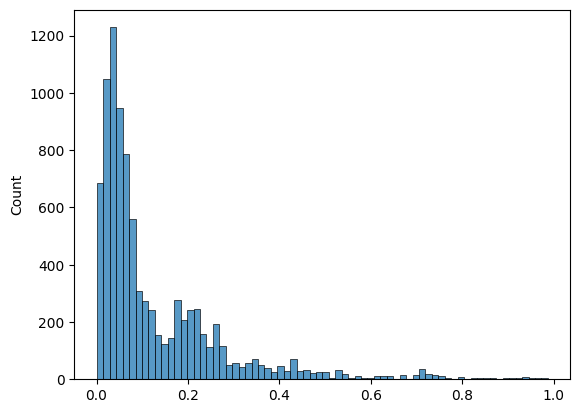

In [ ]:
sns.histplot(y_pred)
plt.show()

In [ ]:
from sklearn.tree import plot_tree

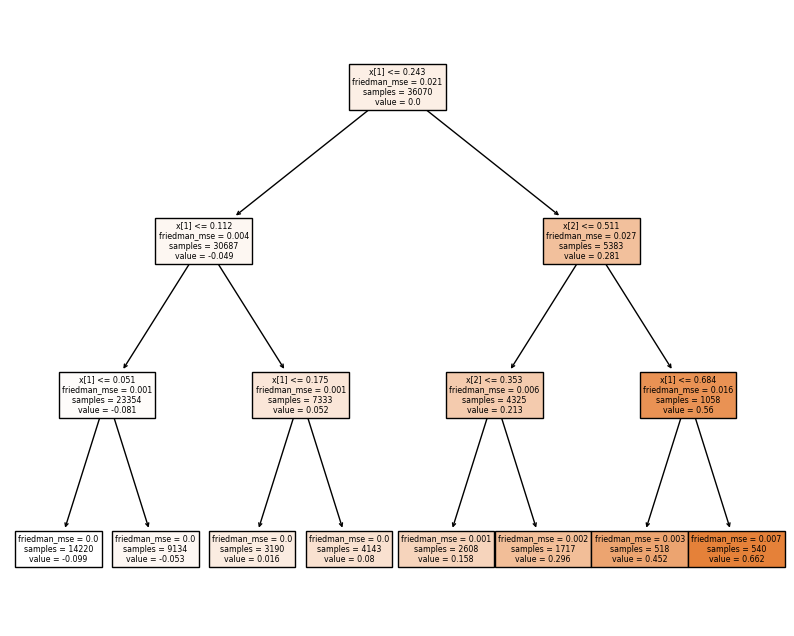

In [ ]:
# Plot the first decision tree
plt.figure(figsize=(10, 8))
plot_tree(gb_model.estimators_[0][0], filled=True) # Access the first tree in the list
plt.show()

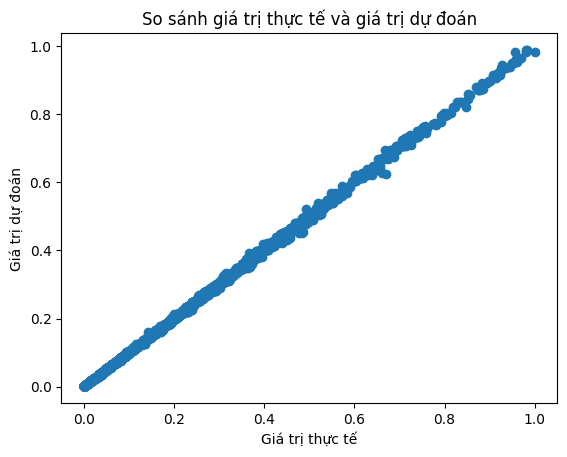

In [ ]:
# Đánh giá kết quả
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh giá trị thực tế và giá trị dự đoán")
plt.show()

In [ ]:
# Kiểm tra độ ổn định và độ tin cậy của mô hình
# Sử dụng Cross-Validation để kiểm tra độ ổn định của mô hình
cv_scores = cross_val_score(GB_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {cv_scores.mean()}")

Cross-Validation R-squared scores: [0.99973408 0.99960199 0.99955251 0.99958513 0.99933976]
Mean Cross-Validation R-squared: 0.9995626915834983


Các chỉ số này thể hiện hiệu suất của mô hình hồi quy qua quá trình kiểm tra chéo (cross-validation). Dưới đây là mô tả và nhận xét cho từng chỉ số:

Cross-Validation R-squared Scores:

[0.99973408, 0.99960199, 0.99955251, 0.99958513, 0.99933976]
Mô tả: Các giá trị này là R-squared (R²) của mô hình trên các tập kiểm tra khác nhau trong quá trình kiểm tra chéo.
Nhận xét: Các giá trị R² đều rất cao và rất gần 1, cho thấy mô hình có khả năng dự đoán rất tốt trên các tập dữ liệu khác nhau. Điều này cho thấy tính ổn định và khả năng tổng quát hóa của mô hình là rất cao.
Mean Cross-Validation R-squared:

0.9995626915834983
Mô tả: Giá trị này là trung bình của các R-squared trên các tập kiểm tra trong quá trình kiểm tra chéo.
Nhận xét: Giá trị trung bình R² là 0.9995626915834983, cũng rất gần 1, cho thấy mô hình duy trì hiệu suất rất cao trên nhiều lần kiểm tra khác nhau. Điều này thể hiện rằng mô hình không chỉ phù hợp với tập dữ liệu huấn luyện mà còn hoạt động tốt trên các tập dữ liệu kiểm tra khác nhau, giảm nguy cơ overfitting.
Tổng kết: Các chỉ số R-squared từ quá trình kiểm tra chéo đều rất cao và nhất quán, cùng với giá trị trung bình R² gần 1, chỉ ra rằng mô hình có hiệu suất rất cao và ổn định. Điều này cho thấy mô hình có khả năng dự đoán chính xác và tổng quát hóa tốt, làm tăng độ tin cậy vào mô hình khi áp dụng vào dữ liệu mới.

In [ ]:
# KIỂM TRA OVERFITTING

In [ ]:
# Import các thư viện cần thiết

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Chia thêm dữ liệu thành tập hold-out validation
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Huấn luyện mô hình trên toàn bộ tập huấn luyện
GB_model.fit(X_train_full, y_train_full)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Dự đoán trên tập hold-out validation
y_holdout_pred = GB_model.predict(X_holdout)

In [ ]:
# Tính toán các chỉ số đánh giá trên tập hold-out validation
holdout_mse = mean_squared_error(y_holdout, y_holdout_pred)
holdout_rmse = np.sqrt(holdout_mse)
holdout_mae = mean_absolute_error(y_holdout, y_holdout_pred)
holdout_r2 = r2_score(y_holdout, y_holdout_pred)

print(f"Hold-out Mean Squared Error: {holdout_mse}")
print(f"Hold-out Root Mean Squared Error: {holdout_rmse}")
print(f"Hold-out Mean Absolute Error: {holdout_mae}")
print(f"Hold-out R-squared: {holdout_r2}")

Hold-out Mean Squared Error: 6.852580568800328e-06
Hold-out Root Mean Squared Error: 0.0026177434115665973
Hold-out Mean Absolute Error: 0.0014048559102786573
Hold-out R-squared: 0.9996948043793208


=> **Các chỉ số trên cho thấy mô hình có hiệu suất rất cao và dự đoán chính xác trên tập dữ liệu hold-out.**
 + Giá trị R² rất cao (gần 1) và các giá trị MSE, RMSE, MAE đều thấp, chỉ ra rằng sai số dự đoán là rất nhỏ. Mô hình không chỉ ổn định và tin cậy trên tập train và tập test mà còn hoạt động tốt trên tập dữ liệu hold-out hoàn toàn mới. Điều này giảm thiểu khả năng overfitting và đảm bảo rằng mô hình có thể tổng quát hóa tốt trên dữ liệu chưa từng thấy.

**Tổng kết**

**Linear Regression:**
+ Mean Squared Error (MSE): 2.887451110720118e-06
+ Root Mean Squared Error (RMSE): 0.0016992501613123708
+ Mean Absolute Error (MAE): 0.0007400411381147923
+ R-squared: 0.9998722419528762

**Random Forest:**
+ Mean Squared Error (MSE): 0.055
+ Root Mean Squared Error (RMSE): 0.2345207879911715
+ Mean Absolute Error (MAE): 0.055
+ R-squared: 0.77997799779978

**Gradient Boosting:**
+ Mean Squared Error (MSE): 7.31411544253504e-06
+ Root Mean Squared Error (RMSE): 0.0027044621355336146
+ Mean Absolute Error (MAE): 0.001422611864772455
+ R-squared: 0.9996763799387259

**Nhận xét và so sánh:**

Mean Squared Error (MSE):

+ Linear Regression có MSE nhỏ nhất (2.887451110720118e-06).
+ Gradient Boosting có MSE nhỏ thứ hai (7.31411544253504e-06).
+ Random Forest có MSE lớn nhất (0.055).

Root Mean Squared Error (RMSE):

+ Linear Regression có RMSE nhỏ nhất (0.0016992501613123708).
+ Gradient Boosting có RMSE nhỏ thứ hai (0.0027044621355336146).
+ Random Forest có RMSE lớn nhất (0.2345207879911715).

Mean Absolute Error (MAE):

+ Linear Regression có MAE nhỏ nhất (0.0007400411381147923).
+ Gradient Boosting có MAE nhỏ thứ hai (0.001422611864772455).
+ Random Forest có MAE lớn nhất (0.055).

R-squared (R²):

+ Linear Regression có R² lớn nhất (0.9998722419528762).
+ Gradient Boosting có R² lớn thứ hai (0.9996763799387259).
+ Random Forest có R² nhỏ nhất (0.77997799779978).

**Kết luận:**
Dựa trên các chỉ số MSE, RMSE, MAE và R-squared, mô hình Linear Regression và Gradient Boosting đều thể hiện hiệu suất rất tốt với sai số rất nhỏ và R² rất cao, gần bằng 1. Tuy nhiên, Linear Regression có các chỉ số nhỏ hơn một chút so với Gradient Boosting, đặc biệt là MSE, RMSE và MAE, cho thấy nó có thể là mô hình tốt nhất trong việc dự đoán dữ liệu này.

Mô hình tối ưu nhất: Linear Regression

Mô hình đứng thứ hai: Gradient Boosting

Mô hình ít tối ưu nhất: Random Forest

Mô hình Random Forest có hiệu suất thấp hơn đáng kể so với hai mô hình còn lại **văn bản in đậm**.


# Result Visualization (Trực quan hóa kết quả):
# Vẽ các biểu đồ so sánh giữa giá dự đoán và giá thực tế.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
# Chuyển đổi cột 'date' thành datetime
stock_prices_df['date'] = pd.to_datetime(stock_prices_df['date'])

# Lọc dữ liệu năm 2020 cho AAPL
data_2020 = stock_prices_df[(stock_prices_df['date'].dt.year == 2020) & (stock_prices_df['stock_symbol']=='AAPL')]  # Use & to combine conditions
# Chuẩn bị dữ liệu huấn luyện
X_train = data_2020[['open', 'high', 'low', 'volume']]
y_train = data_2020['close']

# Lọc dữ liệu quý 1 và quý 2 năm 2021
data_q1_q2_2021 = stock_prices_df[(stock_prices_df['date'] >= '2021-01-01') & (stock_prices_df['date'] <= '2021-06-30') & (stock_prices_df['stock_symbol']=='AAPL')]

# Chuẩn bị dữ liệu kiểm tra
X_test = data_q1_q2_2021[['open', 'high', 'low', 'volume']]
y_test = data_q1_q2_2021['close']

# Khởi tạo và huấn luyện mô hình
LN_model = LinearRegression()
LN_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán
y_pred_LN = LN_model.predict(X_test)

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred_LN)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_LN)
r2 = r2_score(y_test, y_pred_LN)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.802769169775545e-06
Root Mean Squared Error: 0.0013426723985304624
Mean Absolute Error: 0.000991930552265534
R-squared: 0.9712937828833436


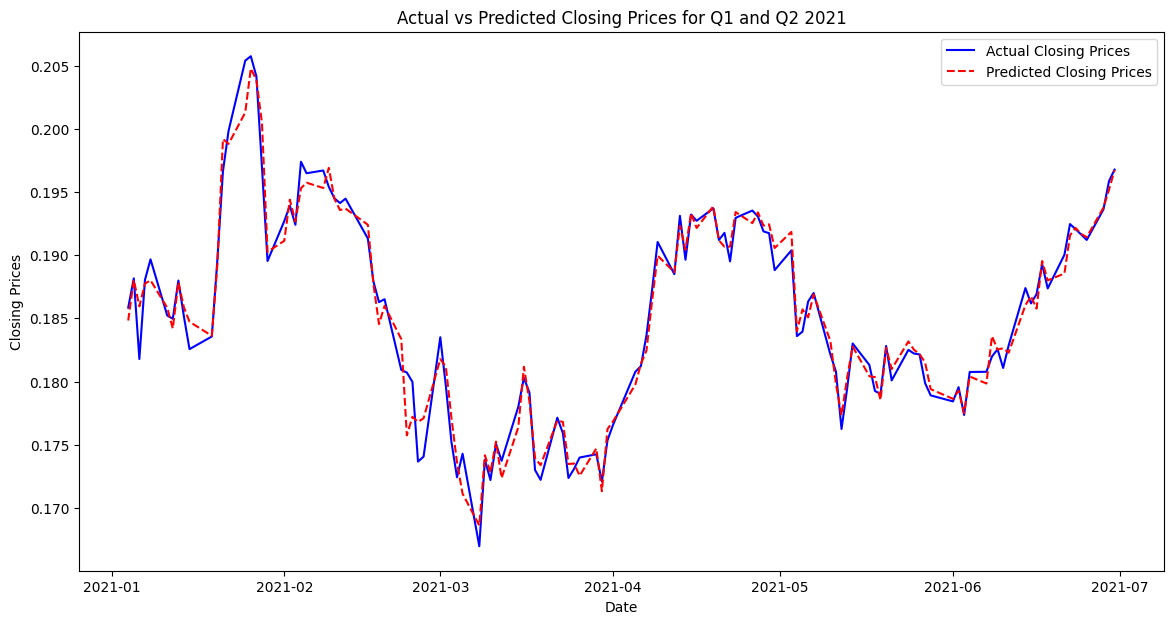

In [ ]:
# Biểu đồ so sánh giá trị thực và dự đoán
plt.figure(figsize=(14, 7))
plt.plot(data_q1_q2_2021['date'], y_test, label='Actual Closing Prices', color='blue')
plt.plot(data_q1_q2_2021['date'], y_pred_LN, label='Predicted Closing Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices for Q1 and Q2 2021')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

Mean Squared Error: 1.77448428608031e-06
Root Mean Squared Error: 0.0013320977014019317
Mean Absolute Error: 0.0009867324420190947
R-squared: 0.9925097177531655


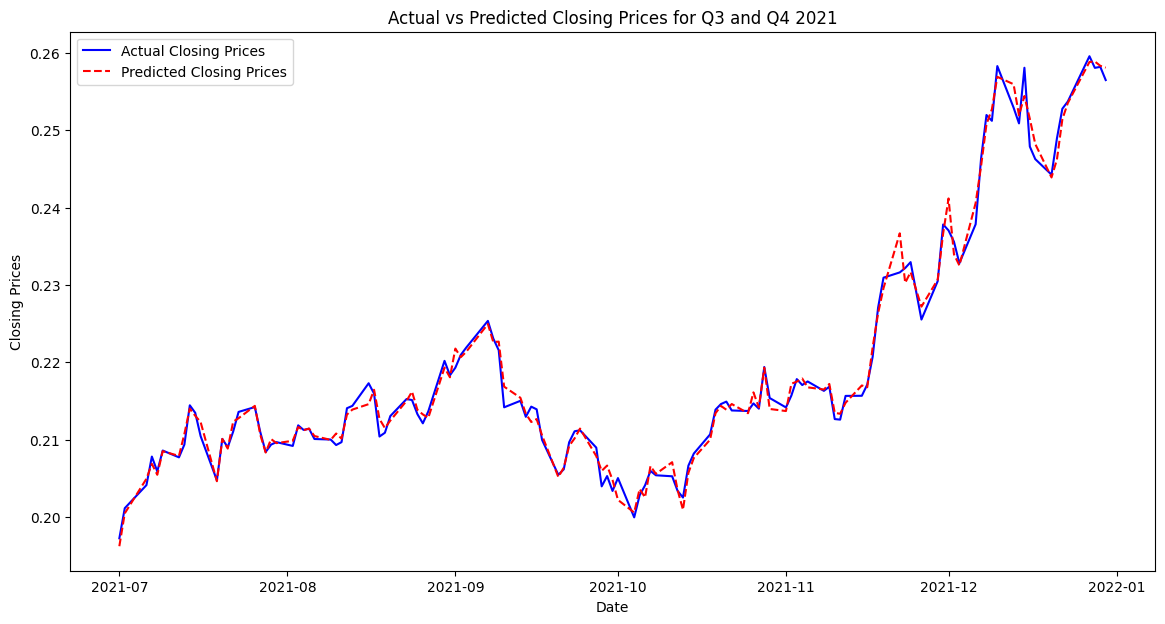

In [ ]:
# Lọc dữ liệu quý 3 và quý 4 năm 2021
data_q3_q4_2021 = stock_prices_df[(stock_prices_df['date'] >= '2021-07-01') & (stock_prices_df['date'] <= '2021-12-30') & (stock_prices_df['stock_symbol']=='AAPL')]

# Chuẩn bị dữ liệu kiểm tra
X_test = data_q3_q4_2021[['open', 'high', 'low', 'volume']]
y_test = data_q3_q4_2021['close']

# Khởi tạo và huấn luyện mô hình
LN_model = LinearRegression()
LN_model.fit(X_train, y_train)

# Dự đoán
y_pred_LN = LN_model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred_LN)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_LN)
r2 = r2_score(y_test, y_pred_LN)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Biểu đồ so sánh giá trị thực và dự đoán
plt.figure(figsize=(14, 7))
plt.plot(data_q3_q4_2021['date'], y_test, label='Actual Closing Prices', color='blue')
plt.plot(data_q3_q4_2021['date'], y_pred_LN, label='Predicted Closing Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices for Q3 and Q4 2021')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

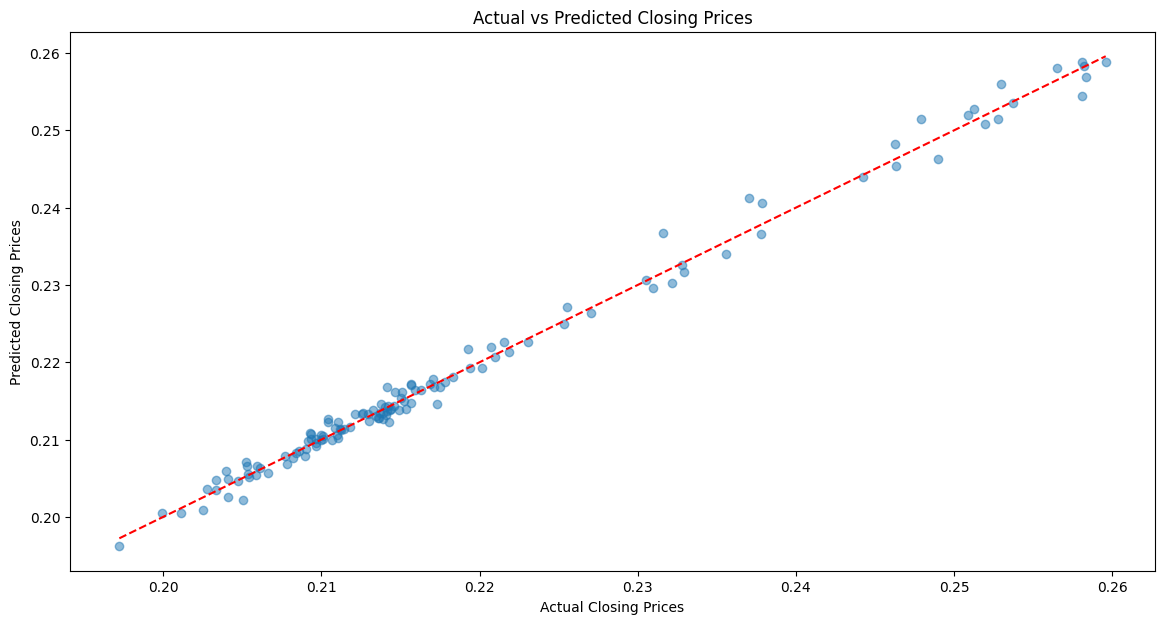

In [ ]:
# So sánh giữa Actual và Predicted
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_LN, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.show()